**PROJETO (II) DA DISCIPLINA SÉRIES TEMPORAIS**

**PROFESSOR: Pedro Henrique Magalhães Braga**

**DISCENTE: Valéria Cristina A. R. de Figueredo**

**OBJETIVO DO TRABALHO**

O presente trabalho realizará as seguintes atividades: definição de uma base de dados, tratamento dos dados, análise descritiva dos dados, escolha de um modelo para predição (modelos clássicos e modelos de redes neurais), avaliações via métricas e análise comparativa (resumo dos resultados).


# **1. Bibliotecas**

In [ ]:
# Instalar o tsai
!pip install tsai

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf,  plot_pacf
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import KPSSTest, auto_arima
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor
import missingno as msno

In [ ]:
# Importando as funções necessárias
from tsai.all import *

In [ ]:
regression_list

['AppliancesEnergy',
 'AustraliaRainfall',
 'BeijingPM10Quality',
 'BeijingPM25Quality',
 'BenzeneConcentration',
 'Covid3Month',
 'FloodModeling1',
 'FloodModeling2',
 'FloodModeling3',
 'HouseholdPowerConsumption1',
 'HouseholdPowerConsumption2',
 'IEEEPPG',
 'LiveFuelMoistureContent',
 'NewsHeadlineSentiment',
 'NewsTitleSentiment']

# **2. Base de dados**

In [ ]:
# Definindo o dataset 'Covid3Month'
dsid = 'Covid3Month'
X, y, splits = get_regression_data(dsid, split_data=False)

153it [00:00, 2172.66it/s]
74it [00:00, 1813.37it/s]


O conjunto de dados Covid3Month contém o número diário de casos confirmados de COVID-19 na maioria dos países do mundo de janeiro a março de 2020. Portanto, cada feature (coluna) significa um dia de tais meses (84 dias) e as 201 linhas representam as ocorrências de Covid em cada um dos 201 países.

[Informações sobre o Dataset](https://ar5iv.labs.arxiv.org/html/2006.10996)

In [ ]:
# Verificando as dimensões dos dados
print(X.shape, y.shape, splits, y[:15])

(201, 1, 84) (201,) ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]) [0.         0.07758621 0.         0.         0.15400309 0.05555556
 0.00467563 0

In [ ]:
#Redimensionamento dos dados

# Redimensionar X de (201, 1, 84) para (201, 84)
X_reshaped = X.reshape(X.shape[0], X.shape[2])

# print X_reshaped
print(X_reshaped.shape)

# Criando um DataFrame para X (as features)
X_df = pd.DataFrame(X_reshaped, columns=[f'feature_{i}' for i in range(X_reshaped.shape[1])])
dataset =X_df


(201, 84)


# **3. Tratamento e Análise de dados**

In [ ]:
# Mostrando as primeiras linhas do dataset
print(dataset.head(201))

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1          0.0        0.0        0.0        0.0        0.0        0.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
196        0.0        0.0        0.0        0.0        0.0        0.0   
197        0.0        0.0        0.0        0.0        0.0        0.0   
198        0.0        0.0        0.0        0.0        0.0        0.0   
199        0.0        0.0        0.0        0.0        0.0        0.0   
200        0.0        0.0        0.0        0.0        0.0        0.0   

     feature_6  feature_7  feature_8  feature_9  ...  feature_74  feature_75  \
0          0.0        0.0        0.0       

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 84 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   201 non-null    float64
 1   feature_1   201 non-null    float64
 2   feature_2   201 non-null    float64
 3   feature_3   201 non-null    float64
 4   feature_4   201 non-null    float64
 5   feature_5   201 non-null    float64
 6   feature_6   201 non-null    float64
 7   feature_7   201 non-null    float64
 8   feature_8   201 non-null    float64
 9   feature_9   201 non-null    float64
 10  feature_10  201 non-null    float64
 11  feature_11  201 non-null    float64
 12  feature_12  201 non-null    float64
 13  feature_13  201 non-null    float64
 14  feature_14  201 non-null    float64
 15  feature_15  201 non-null    float64
 16  feature_16  201 non-null    float64
 17  feature_17  201 non-null    float64
 18  feature_18  201 non-null    float64
 19  feature_19  201 non-null    f

São 84 colunas originais (dias), com 201 linhas (países). Logo, os dados estão bem regulares perante todo o dataframe, sem dados ausentes.

In [ ]:
print(dataset.describe)

<bound method NDFrame.describe of      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1          0.0        0.0        0.0        0.0        0.0        0.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
196        0.0        0.0        0.0        0.0        0.0        0.0   
197        0.0        0.0        0.0        0.0        0.0        0.0   
198        0.0        0.0        0.0        0.0        0.0        0.0   
199        0.0        0.0        0.0        0.0        0.0        0.0   
200        0.0        0.0        0.0        0.0        0.0        0.0   

     feature_6  feature_7  feature_8  feature_9  ...  feature_74  feature_75  \
0        

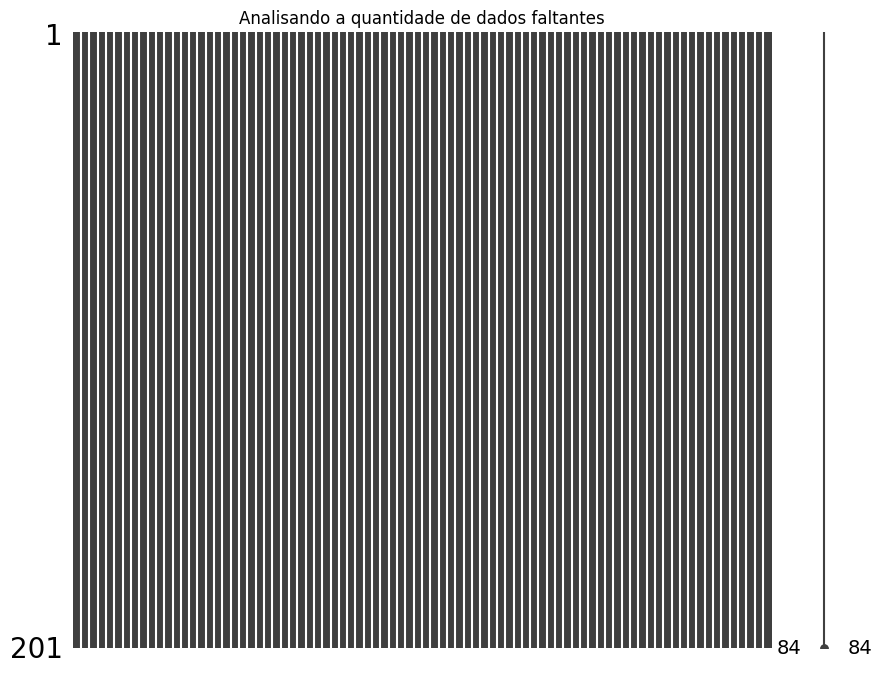

In [ ]:
msno.matrix(dataset, figsize=(10,8))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Não há dados faltantes, nulos. Portanto, não é necessário realizar tratamento desse aspecto.

In [ ]:
# Substituição das colunas com nomes feature_0 e assim por diante por suas datas
# Gerar um intervalo de datas começando de 1º de janeiro de 2024
num_colunas = dataset.shape[1]  # Número de colunas no DataFrame
datas = pd.date_range(start="2020-01-01", periods=num_colunas, freq='D')

# Substituir os nomes das colunas pelas datas geradas
dataset.columns = datas

# Exibir o DataFrame com as novas colunas
print(dataset)

     2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  2020-01-06  \
0           0.0         0.0         0.0         0.0         0.0         0.0   
1           0.0         0.0         0.0         0.0         0.0         0.0   
2           0.0         0.0         0.0         0.0         0.0         0.0   
3           0.0         0.0         0.0         0.0         0.0         0.0   
4           0.0         0.0         0.0         0.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
196         0.0         0.0         0.0         0.0         0.0         0.0   
197         0.0         0.0         0.0         0.0         0.0         0.0   
198         0.0         0.0         0.0         0.0         0.0         0.0   
199         0.0         0.0         0.0         0.0         0.0         0.0   
200         0.0         0.0         0.0         0.0         0.0         0.0   

     2020-01-07  2020-01-08  2020-01-09  2020-01-10

O dia com a maior média de ocorrências de COVID-19 é '2020-03-21 00:00:00' com média de 312.06


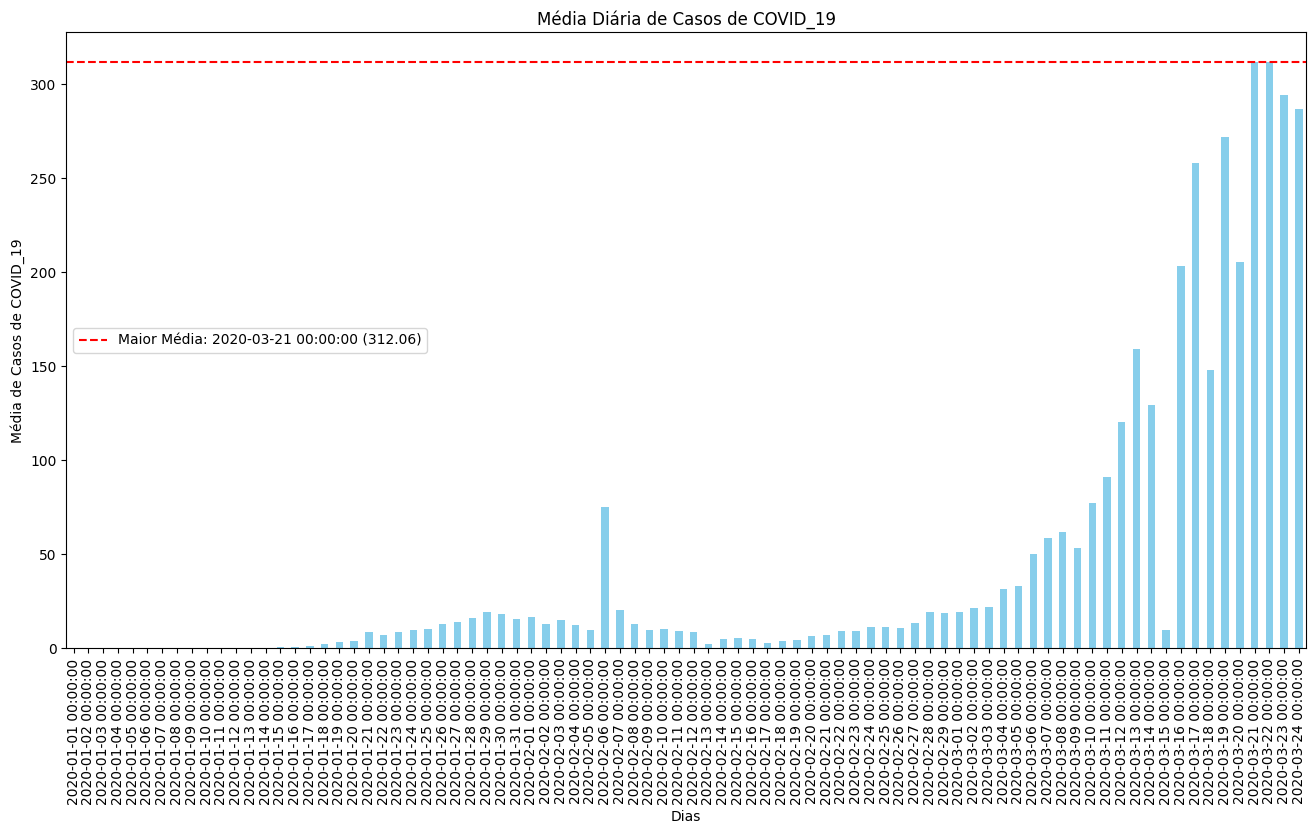

In [ ]:
# Média Diária de ocorrências de COVID-19 - GRáfico de Coluna Vertical

# Calculando a média das colunas
mean_values = dataset.mean()

# Encontrando a coluna com a maior média
max_column = mean_values.idxmax()
max_value = mean_values.max()

# Exibindo o resultado
print(f"O dia com a maior média de ocorrências de COVID-19 é '{max_column}' com média de {max_value:.2f}")

# Visualização
plt.figure(figsize=(16, 8))
mean_values.plot(kind='bar', color='skyblue')
plt.title("Média Diária de Casos de COVID_19")
plt.xlabel("Dias")
plt.ylabel("Média de Casos de COVID_19")
plt.axhline(max_value, color='red', linestyle='--', label=f'Maior Média: {max_column} ({max_value:.2f})')
plt.legend()
plt.show()

Nos 84 dias analisados, o valor médio máximo de ocorrências de COVID-19 ocorreu no dia 81 (312.06 mortos)- 21 de março de 2020. Até o dia 14 de janeiro, a média de CASOS é 0, isto é, não foram registrados casos de COVID nesses dias.

É interessante ressaltar que essa é a media dos Casos de COVID_19, analisando todos os países em um determinado dia. Posteriormente será analisada a mediana, pois a média pode ser muito influenciada por outliers (valores extremos) no conjunto de dados. Se um ou mais valores estiverem muito distantes um dos outros, eles podem distorcer a média e fazer com que ela não represente bem o "valor típico" dos dados.



O dia com a maior mediana é '2020-03-19 00:00:00' com mediana de 8.00


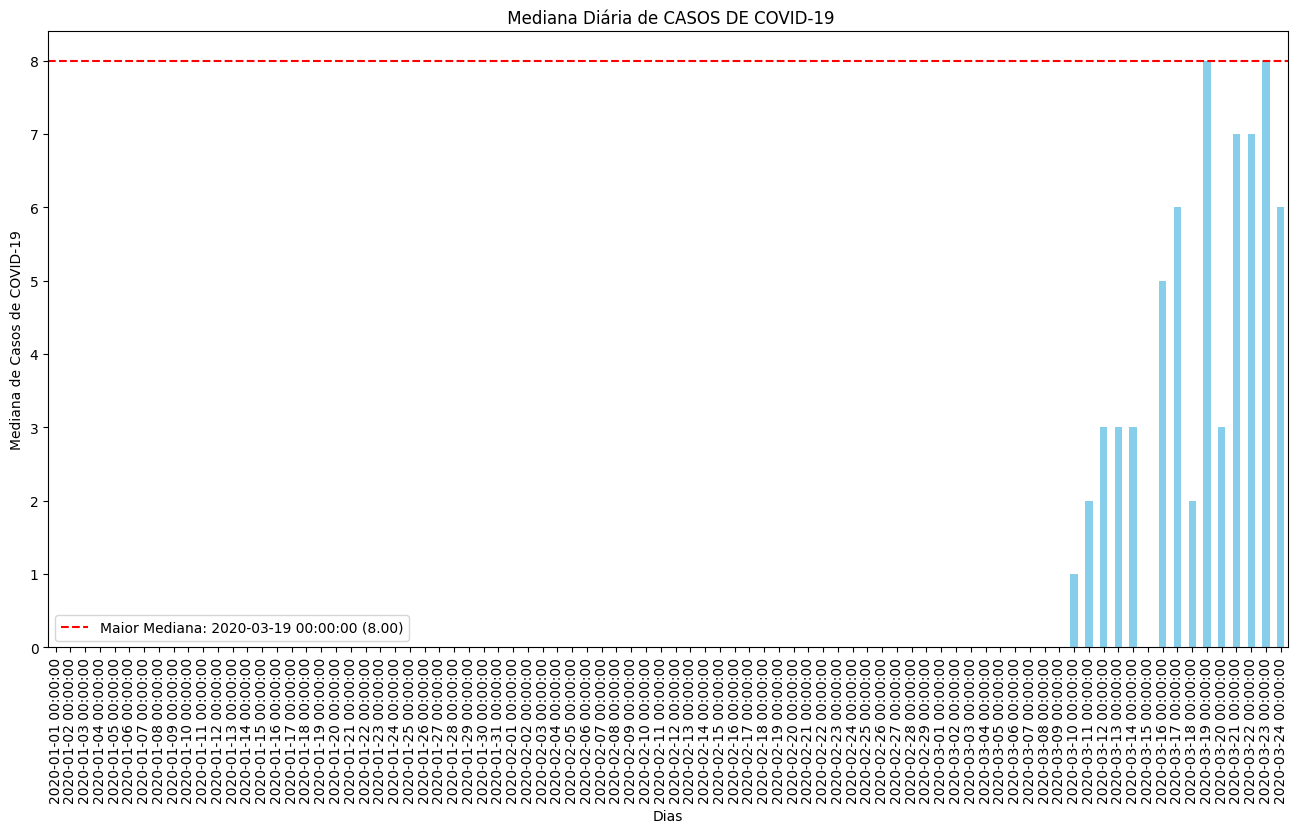

In [ ]:
# # Mediana Diária de ocorrências de COVID-19 - GRáfico de Coluna Vertical
# Calculando a mediana das colunas
median_values = dataset.median()

# Encontrando a coluna - dia com a maior mediana
max_column = median_values.idxmax()
max_value = median_values.max()

# Exibindo o resultado
print(f"O dia com a maior mediana é '{max_column}' com mediana de {max_value:.2f}")

# Visualização
plt.figure(figsize=(16, 8))
median_values.plot(kind='bar', color='skyblue')
plt.title(" Mediana Diária de CASOS DE COVID-19")
plt.xlabel("Dias")
plt.ylabel("Mediana de Casos de COVID-19")
plt.axhline(max_value, color='red', linestyle='--', label=f'Maior Mediana: {max_column} ({max_value:.2f})')
plt.legend()
plt.show()


A mediana é uma medida de tendência central que divide um conjunto de dados ordenado em duas partes iguais, de forma que 50% dos valores estão abaixo da mediana e 50% estão acima dela. O dia com a maior mediana é 'feature_78'(dia 79)-19 de março de 2020 com mediana de 8.00.

O dia com maior número de Casos de COVID-19 é '2020-03-21 00:00:00', com soma de 62724.00.


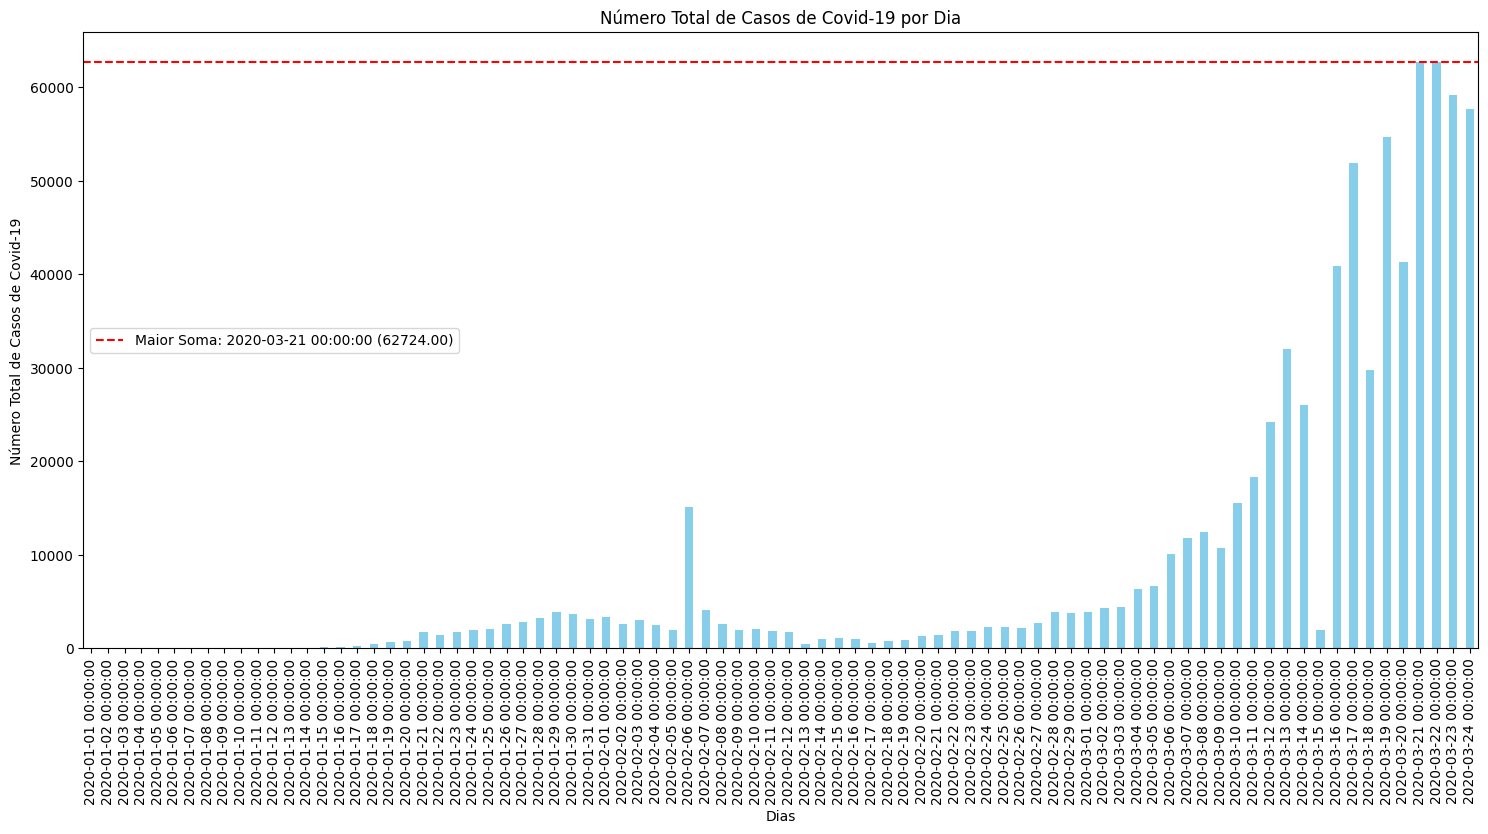

In [ ]:
# Número Total de Casos de COVID-19 por Dia- Gráfico Vertical
# Somando os valores de cada coluna
sum_values = dataset.sum()

# Encontrando a coluna com a maior soma total
max_column = sum_values.idxmax()
max_value = sum_values.max()

# Exibindo o resultado
print(f"O dia com maior número de Casos de COVID-19 é '{max_column}', com soma de {max_value:.2f}.")

# Visualização
plt.figure(figsize=(18, 8))
sum_values.plot(kind='bar', color='skyblue')
plt.title("Número Total de Casos de Covid-19 por Dia")
plt.xlabel("Dias")
plt.ylabel("Número Total de Casos de Covid-19")
plt.axhline(max_value, color='red', linestyle='--', label=f'Maior Soma: {max_column} ({max_value:.2f})')
plt.legend()
plt.show()


O dia com o maior número de casos de COVID-19 nos 201 países foi o octagésimo primeiro dia: 21 de março de 2020 ( feature_80), com 62.724 ocorrências.

O país com o maior número total de casos de COVID-19 é '35', com 140640.00 mortes.


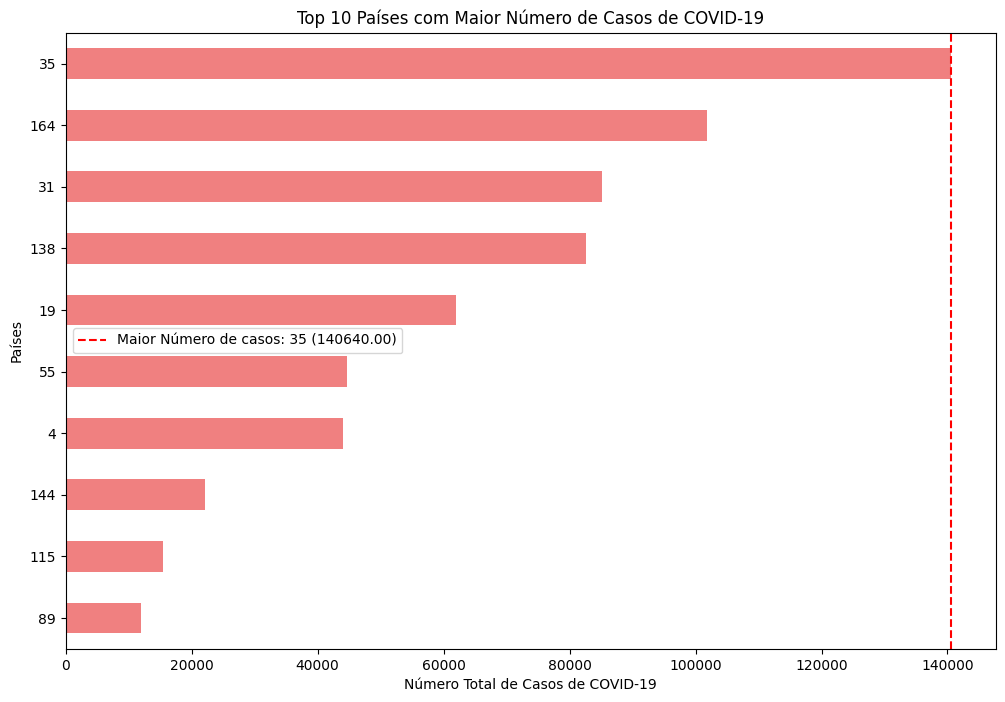

In [ ]:
# TOP 10 países com o maior número total de Ocorrências de COVID-19 - Gráfico Horizontal
# Somando os valores de cada linha (país)
total_per_country = dataset.sum(axis=1)

# Capturando os 10 países com o maior número de ocorrências
top_10 = total_per_country.nlargest(10)

# Encontrando o país com o maior número total de casos
max_country = top_10.idxmax()
max_deaths = top_10.max()

# Exibindo o resultado
print(f"O país com o maior número total de casos de COVID-19 é '{max_country}', com {max_deaths:.2f} mortes.")

# Visualização
plt.figure(figsize=(12, 8))
top_10.sort_values(ascending=True).plot(kind='barh', color='lightcoral')  # Gráfico horizontal
plt.title("Top 10 Países com Maior Número de Casos de COVID-19")
plt.xlabel("Número Total de Casos de COVID-19")
plt.ylabel("Países")
plt.axvline(max_deaths, color='red', linestyle='--', label=f'Maior Número de casos: {max_country} ({max_deaths:.2f})')
plt.legend()
plt.show()


Esse gráfico representa os dez países com maior número de casos por COVID- 19 em valores absolutos. O país com o maior número de casos foi o da linha 35, com 140.640 ocorrências durante esse período.

Considerando que não foi encontrada a documentação que especifica os nomes dos países tratados, foi feita uma pesquisa externa. Segundo a BBC, até 02 de outubro de 2020, os países com maior número de casos registrados foram Estados Unidos (7.279.065), Índia (6.394.068), Brasil (4.847.092), Rússia (1.188.928), Colômbia (835.339), Peru (814.829), Espanha (778.607), Argentina (765.002), México (748.315) e África do Sul (676.084). [Fonte-BBC](https://www.bbc.com/portuguese/geral-54390838)

E segundo wikiwand, cujo artigo estruturou uma análise cronológica da pandemia, nesse período, os Estados Unidos foi o primeiro país a ultrapassar os 100 mil número de ocorrências de COVID-19. [Fonte Wikiwand](https://www.wikiwand.com/pt/articles/Cronologia_da_pandemia_de_COVID-19_nos_Estados_Unidos)

É de grande importância ter conhecimento aprofundado dos dados da pesquisa, mas devido ao limite temporal do estudo não foi possível entrar em contato com os criadores do dataset. Portanto, por inferência externa, os Estados Unidos será considerado o país da linha 35 para futuras análises.



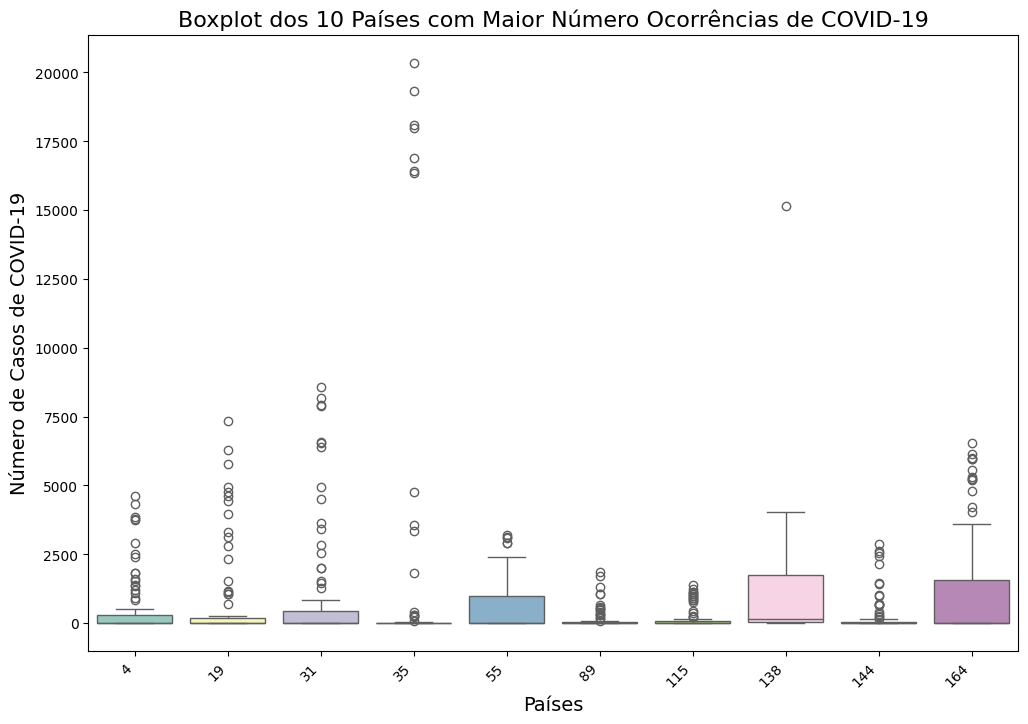

In [ ]:
# Boxplot dos 10 países com maior número de casos
# Somando os valores de cada linha (país) para obter o número total de casos por país
total_per_country = dataset.sum(axis=1)

# Pegando os 10 países com o maior número de casos
top_10 = total_per_country.nlargest(10)

# Filtrando o dataset para pegar apenas os 10 países com mais casos
top_10_dataset = dataset.loc[top_10.index]

# Criando o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_dataset.T, palette="Set3")

# Configurações de título e rótulos
plt.title("Boxplot dos 10 Países com Maior Número Ocorrências de COVID-19", fontsize=16)
plt.xlabel("Países", fontsize=14)
plt.ylabel("Número de Casos de COVID-19", fontsize=14)

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.show()


O boxplot é uma ferramenta gráfica essencial para visualizar a distribuição de um conjunto de dados e os outliers. Quando comparado esse gráfico com o anterior, é possível concluir que o país com o maior número de casos -  país da linha 35 (por inferência, Estados Unidos) é o país com o maior número de possíveis outliers. Portanto, seria importante fazer uma checagem  dos dados para confirmar sua precisão e consistência.

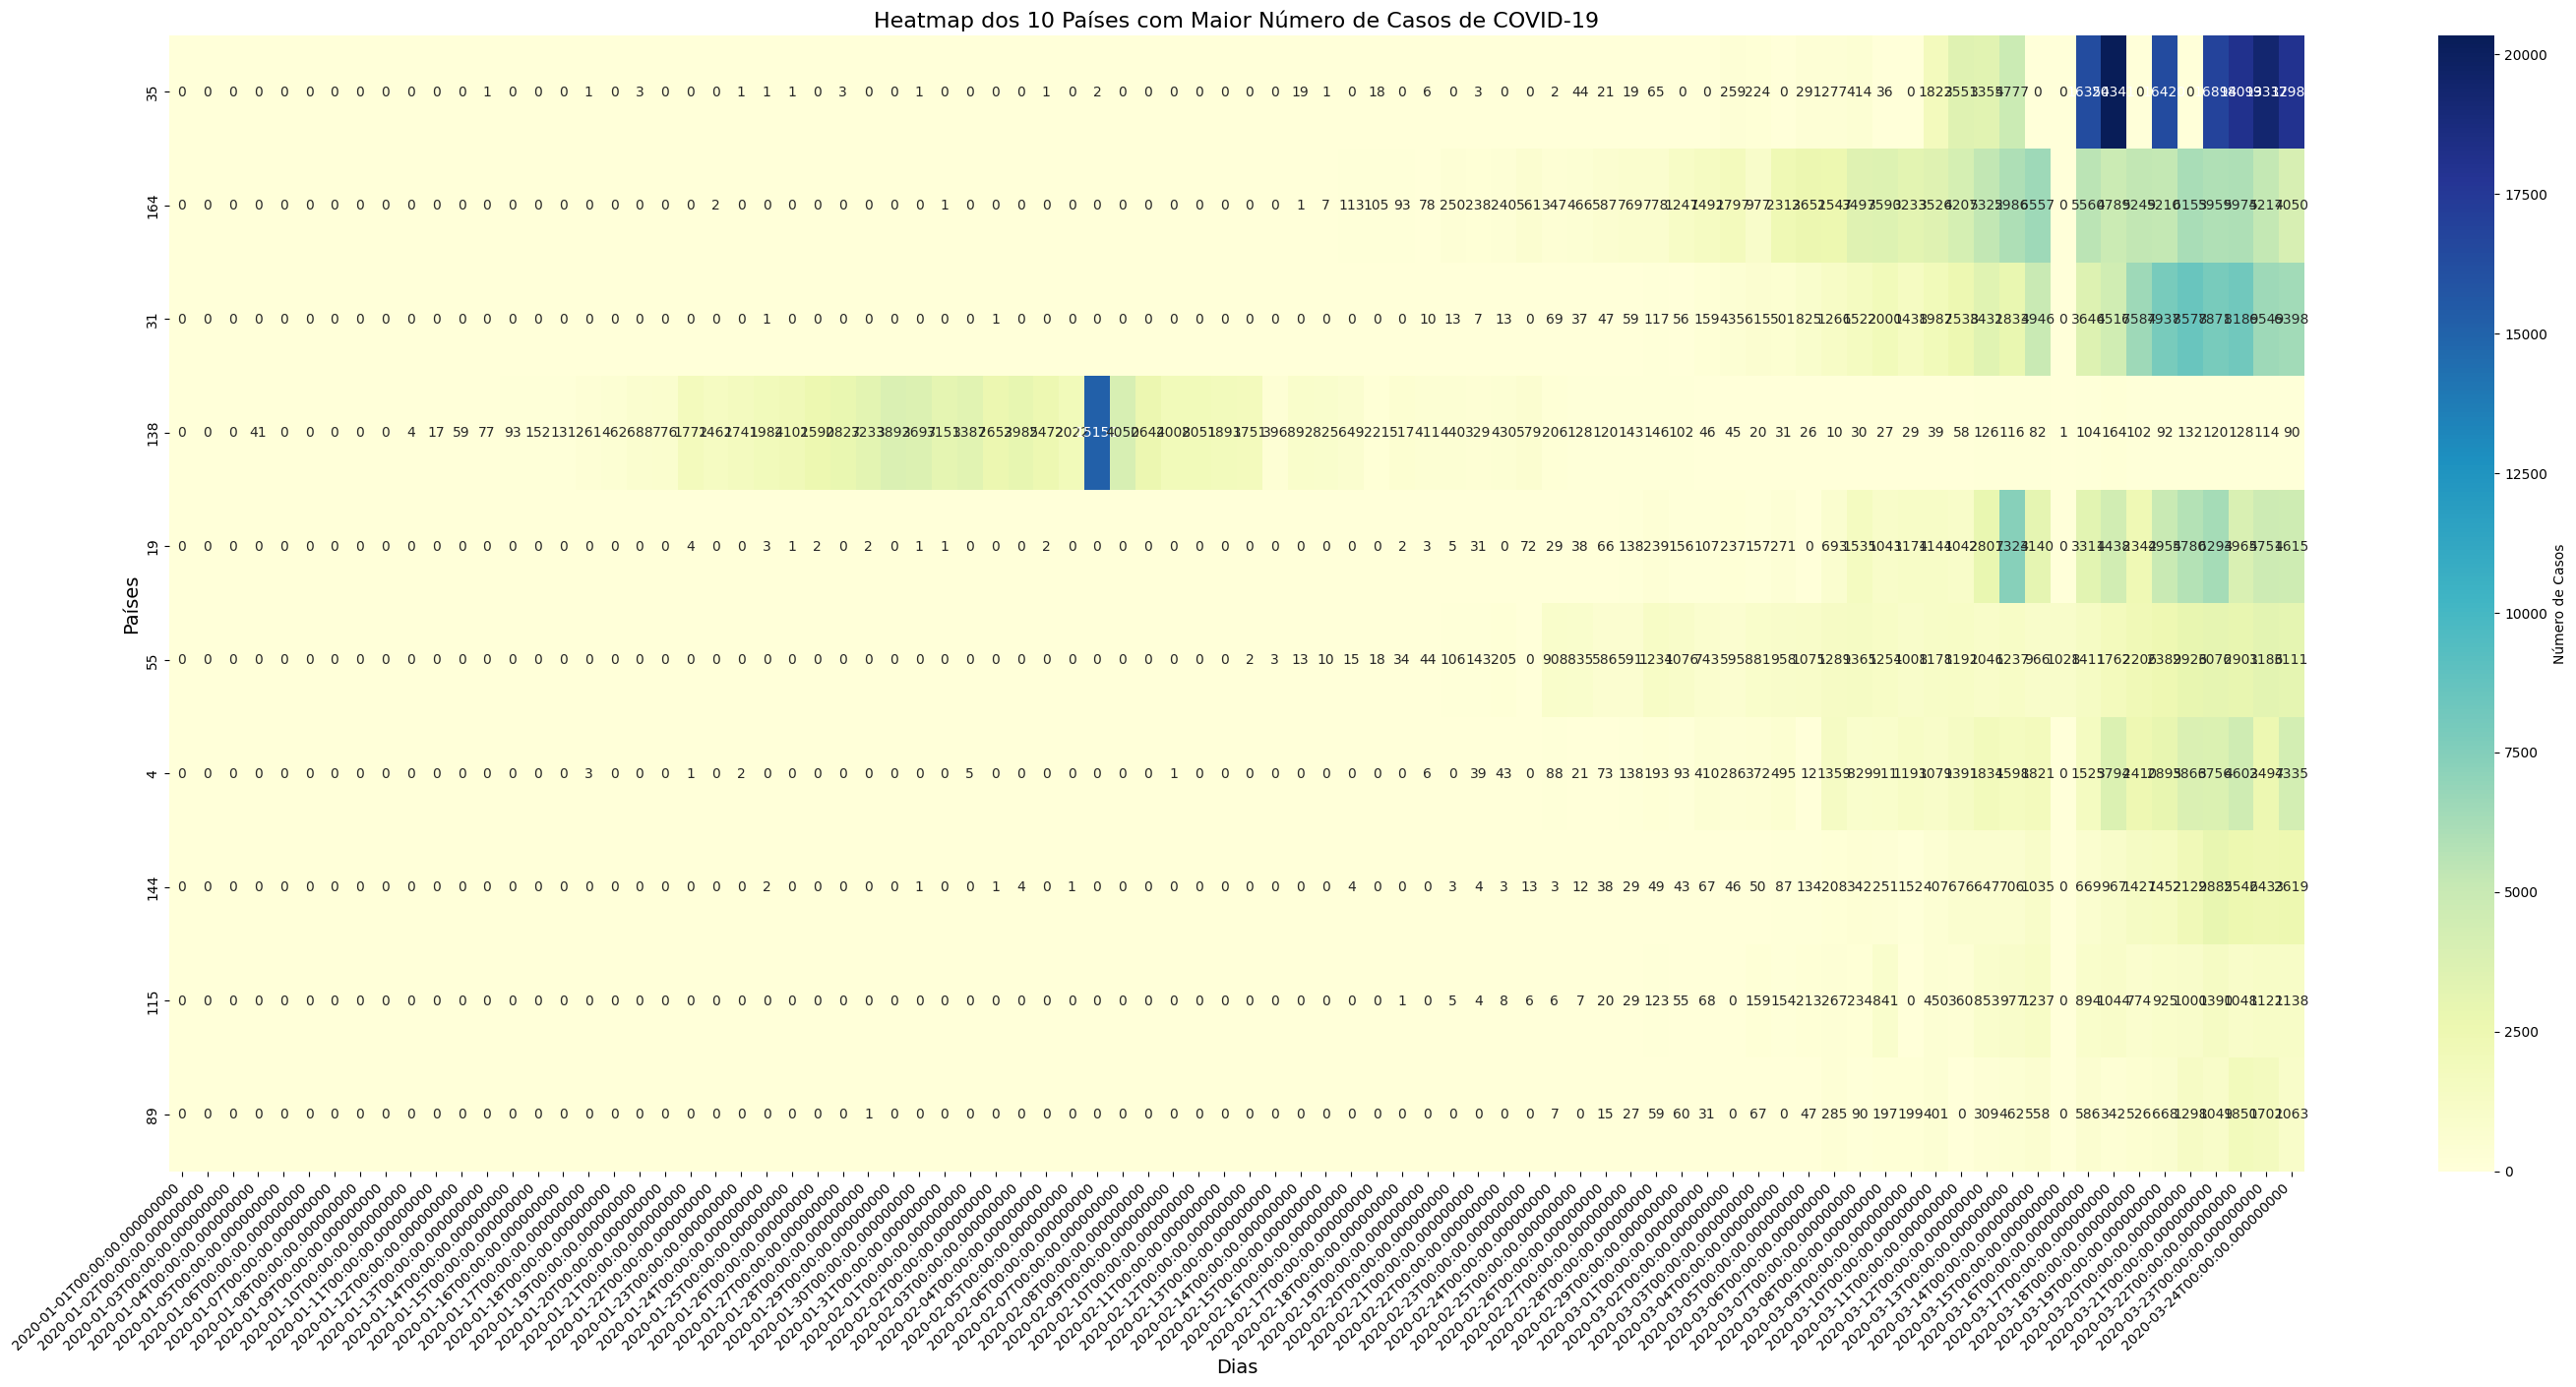

In [ ]:
# Heatmap dos 10 Países com Maior Número de Casos
# Somando os valores de cada linha (país) para obter o número total de casos por país
total_per_country = dataset.sum(axis=1)

# Reunindo os 10 países com o maior número de casos
top_10_ = total_per_country.nlargest(10)

# Filtrando o dataset para pegar apenas os 10 países com mais casos
top_10_dataset = dataset.loc[top_10.index]

# Criando o heatmap
plt.figure(figsize=(35, 15))
sns.heatmap(top_10_dataset, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Número de Casos'})

# Configurações de título e rótulos
plt.title("Heatmap dos 10 Países com Maior Número de Casos de COVID-19", fontsize=16)
plt.xlabel("Dias", fontsize=14)
plt.ylabel("Países", fontsize=14)

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.show()


O heatmap (mapa de calor) é uma representação gráfica de dados onde os seus valores são representados por diferentes intensidades de cores. Ele é útil para visualizar padrões e variações em grandes volumes de dados, permitindo uma análise rápida das relações entre as variáveis.

Ele foi importante para o dataset em comento porque permite analisar os picos de ocorrências (onde a cor é mais intensa), aumento gradual ou países com menor variação (onde a cor é mais uniforme ou fria). Novamente é possível constatar que o país da linha 35 (por inferência, Estados Unidos) teve um aumento brusco de ocorrências, mas agora é possível identificar que esses picos ocorreram no final do período analisado (últimos dez dias). E o país da linha 138 teve a distribuição dos casos registrados de COVID-19 mais uniforme ao longo do tempo.

In [ ]:
# Transpondo as linhas em colunas
df = dataset.transpose() # agora as linhas se transformarão em colunas e as colunas em linhas para facilitar análises das séries temporais

print(df)

             0    1    2    3       4    5     6    7      8      9    ...  \
2020-01-01   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-02   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-03   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-04   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-05   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
...          ...  ...  ...  ...     ...  ...   ...  ...    ...    ...  ...   
2020-03-20   0.0  0.0  0.0  0.0  3866.0  0.0  65.0  0.0  196.0  123.0  ...   
2020-03-21   3.0  7.0  0.0  0.0  3756.0  0.0  88.0  0.0  228.0  263.0  ...   
2020-03-22   0.0  9.0  0.0  3.0  4603.0  4.0  73.0  0.0  270.0  160.0  ...   
2020-03-23   0.0  0.0  0.0  1.0  2497.0  2.0  57.0  0.0    0.0  308.0  ...   
2020-03-24  12.0  0.0  0.0  0.0  4335.0  4.0  66.0  0.0  303.0  192.0  ...   

             191  192  193   194  195   196   197  198  199   2

In [ ]:
print(df[35]) # País Estados Unidos (por inferência)

2020-01-01        0.0
2020-01-02        0.0
2020-01-03        0.0
2020-01-04        0.0
2020-01-05        0.0
               ...   
2020-03-20        0.0
2020-03-21    16894.0
2020-03-22    18093.0
2020-03-23    19332.0
2020-03-24    17987.0
Freq: D, Name: 35, Length: 84, dtype: float64


In [ ]:
print(df[138]) #Pais: Rússia (por inferência)

2020-01-01      0.0
2020-01-02      0.0
2020-01-03      0.0
2020-01-04     41.0
2020-01-05      0.0
              ...  
2020-03-20    132.0
2020-03-21    120.0
2020-03-22    128.0
2020-03-23    114.0
2020-03-24     90.0
Freq: D, Name: 138, Length: 84, dtype: float64


# **4.Técnica estatística: Média Móvel**

In [ ]:
def create_mv_avg(df, mv_size):
  return df.rolling(mv_size).mean().values

In [ ]:
df_MM = df

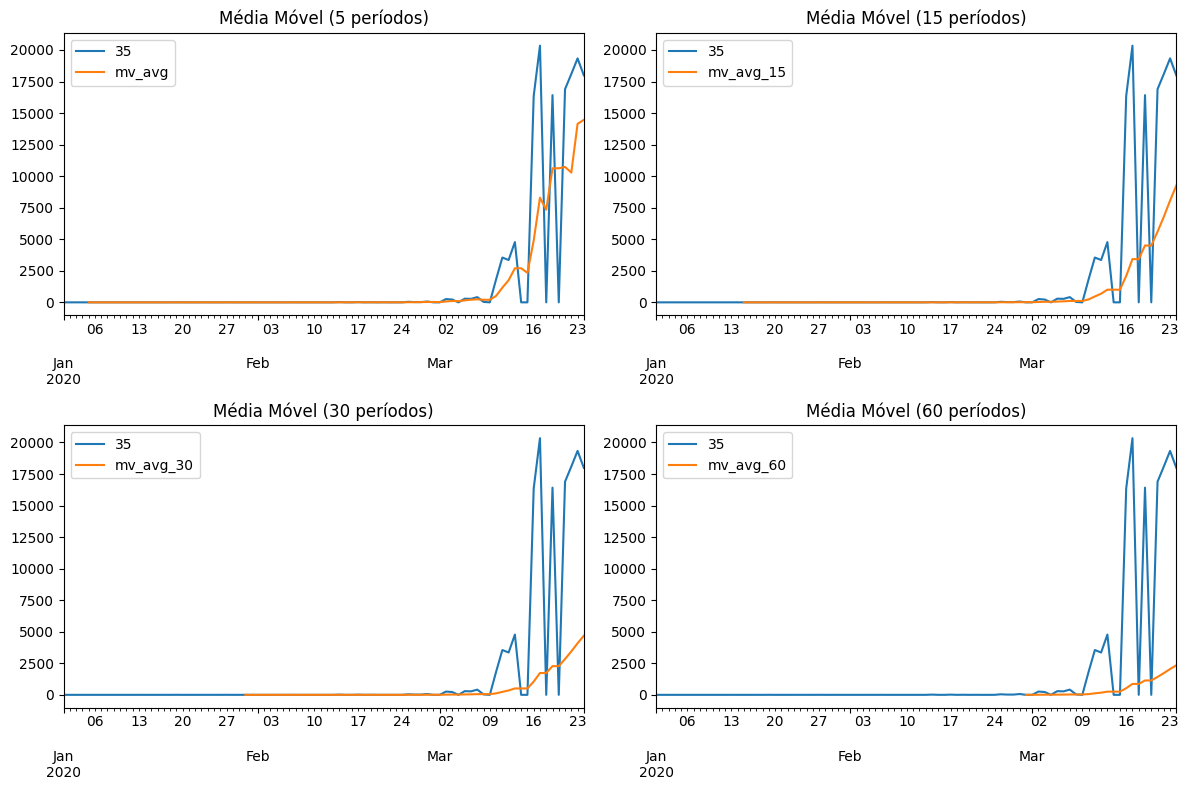

In [ ]:
#Média Móvel aplicada ao país da Linha 35 (Estados Unidos, por inferência)
# Subgráfico para 5 períodos
mv_size = 5
df_MM["mv_avg"] = create_mv_avg(df_MM[35], mv_size)

# Subgráfico para 15 períodos
mv_size_15 = 15
df_MM["mv_avg_15"] = create_mv_avg(df_MM[35], mv_size_15)

# Subgráfico para 30 períodos
mv_size_30 = 30
df_MM["mv_avg_30"] = create_mv_avg(df_MM[35], mv_size_30)

# Subgráfico para 60 períodos
mv_size_60 = 60
df_MM["mv_avg_60"] = create_mv_avg(df_MM[35], mv_size_60)

# Criar a figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # Ajustando o tamanho da figura

# Plotando o primeiro gráfico (mv_size = 5)
df_MM[[35, "mv_avg"]].plot(ax=axs[0, 0], title="Média Móvel (5 períodos)", legend=True)

# Plotando o segundo gráfico (mv_size = 15)
df_MM[[35, "mv_avg_15"]].plot(ax=axs[0, 1], title="Média Móvel (15 períodos)", legend=True)

# Plotando o terceiro gráfico (mv_size = 30)
df_MM[[35, "mv_avg_30"]].plot(ax=axs[1, 0], title="Média Móvel (30 períodos)", legend=True)

# Plotando o quarto gráfico (mv_size = 60)
df_MM[[35, "mv_avg_60"]].plot(ax=axs[1, 1], title="Média Móvel (60 períodos)", legend=True)

# Exibir os gráficos
plt.tight_layout()  # Ajusta os gráficos para que fiquem bem distribuídos
plt.show()

A média móvel (moving average) é uma técnica utilizada para suavizar uma série temporal, eliminando flutuações de curto prazo e ajudando a destacar tendências de médio e longo prazo ou padrões subjacentes.

Nos gráficos plotados, a série temporal tem 84 dias e o país analisado é os Estados Unidos (por inferência). Portanto, há 84 pontos de dados nos gráficos.

Com a janela de 5 dias (5 períodos), a média móvel de cada ponto é calculada considerando os 5 dias anteriores. Isso cria uma suavização que ajuda a visualizar tendências de curto prazo.

Com a janela de 15 dias (15 períodos), a média móvel é mais suave, refletindo melhor as tendências de médio prazo e ignorando as flutuações menores.

As janelas de 30 e 60 dias (30 e 60 períodos) ajudam a visualizar tendências de longo prazo, suavizam as variações de curto e médio prazo e refletem as tendências duradouras a longo prazo. Portanto, respondem de forma lenta as mudanças bruscas nos dados, destacando as tendências globais e duradouras. Dessa forma, por muito tempo ter tido 0 casos, a média móvel ficou muito suave.

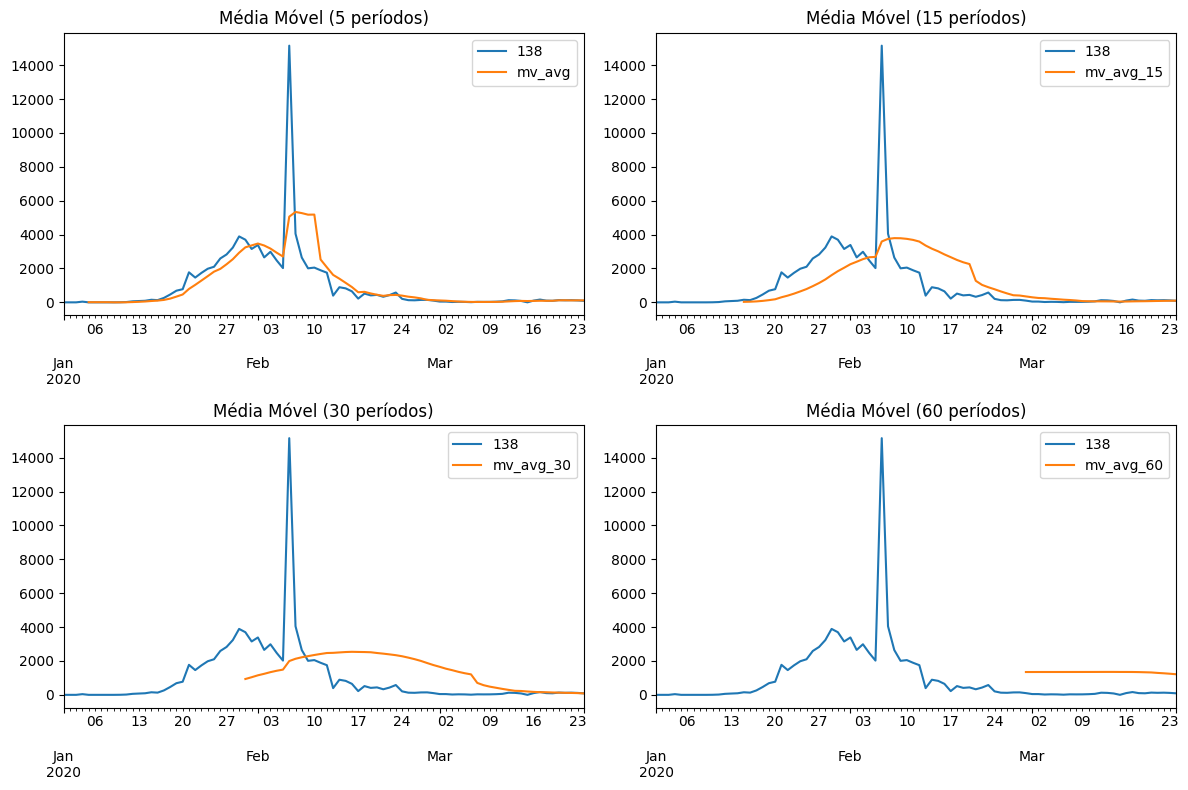

In [ ]:
#Média Móvel aplicada ao país da Linha 138 (Rússia, por inferência)
# Subgráfico para 5 períodos
mv_size = 5
df_MM["mv_avg"] = create_mv_avg(df_MM[138], mv_size)

# Subgráfico para 15 períodos
mv_size_15 = 15
df_MM["mv_avg_15"] = create_mv_avg(df_MM[138], mv_size_15)

# Subgráfico para 30 períodos
mv_size_30 = 30
df_MM["mv_avg_30"] = create_mv_avg(df_MM[138], mv_size_30)

# Subgráfico para 60 períodos
mv_size_60 = 60
df_MM["mv_avg_60"] = create_mv_avg(df_MM[138], mv_size_60)

# Criar a figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # Ajustando o tamanho da figura

# Plotando o primeiro gráfico (mv_size = 5)
df_MM[[138, "mv_avg"]].plot(ax=axs[0, 0], title="Média Móvel (5 períodos)", legend=True)

# Plotando o segundo gráfico (mv_size = 15)
df_MM[[138, "mv_avg_15"]].plot(ax=axs[0, 1], title="Média Móvel (15 períodos)", legend=True)

# Plotando o terceiro gráfico (mv_size = 30)
df_MM[[138, "mv_avg_30"]].plot(ax=axs[1, 0], title="Média Móvel (30 períodos)", legend=True)

# Plotando o quarto gráfico (mv_size = 60)
df_MM[[138, "mv_avg_60"]].plot(ax=axs[1, 1], title="Média Móvel (60 períodos)", legend=True)

# Exibir os gráficos
plt.tight_layout()  # Ajusta os gráficos para que fiquem bem distribuídos
plt.show()

Nos gráficos plotados, a série temporal tem 84 dias e o país analisado é a Rússia (por inferência externa). Portanto, há 84 pontos de dados nos gráficos.

Esse país foi o quarto país do top 10 - maior número de casos de Covid 19, mas foi o país com distribuição mais uniforme dos casos registrados de COVID-19 ao longo do tempo.

Com a janela de 5 dias (5 períodos), a média móvel de cada ponto é calculada considerando os 5 dias anteriores. Isso criou uma suavização principalmente nos meses de janeiro e fevereiro, onde tinha grande predominância de dados.

Com a janela de 15 dias (15 períodos), a média móvel é mais suave, refletindo melhor as tendências de médio prazo e ignorando as flutuações menores. Aqui, a suvização ocorreu mais no mês de fevereiro.

As janelas de 30 e 60 dias (30 e 60 períodos) ajudam a visualizar tendências de longo prazo, suavizam as variações de curto e médio prazo e refletem as tendências duradouras a longo prazo. Portanto, respondem de forma lenta as mudanças bruscas nos dados, destacando as tendências globais e duradouras. Dessa forma, a suavização tomou outro formato, mais oval (30 períodos) e linear (60 períodos), pois os casos começaram a baixar nos 30 e 60 últimos dias.

# **5. Auto Correlação e Auto Correlação Parcial**

<Figure size 800x600 with 0 Axes>

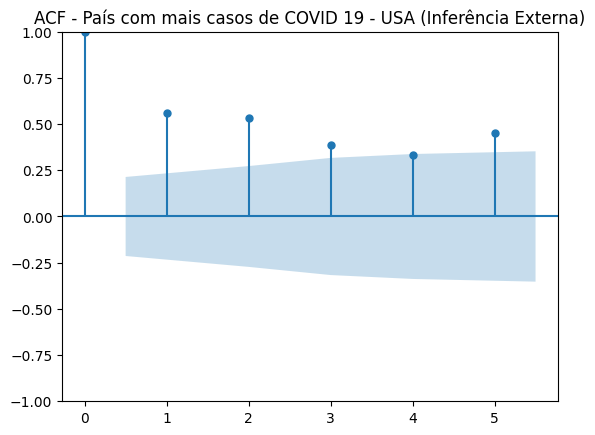

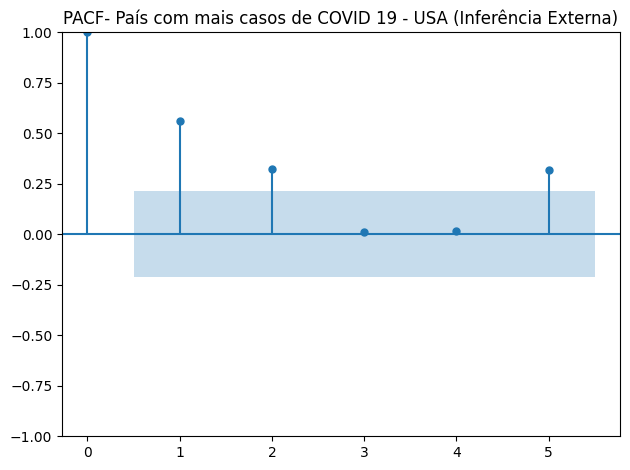

In [ ]:
#Autocorrelação (ACF) e Autocorrelação Parcial (PACF) do país da linha 35 (Estados Unidos, inferência externa)
# Criar a figura para o gráfico de ACF
plt.figure(figsize=(8, 6))  # Tamanho do gráfico

# Plotando a autocorrelação
plot_acf(df_MM[35], lags=5)

# Adicionando título ao gráfico
plt.title("ACF - País com mais casos de COVID 19 - USA (Inferência Externa)")

# Plotando a autocorrelação Parcial
plot_pacf(df_MM[35], lags=5)

# Adicionando título ao gráfico
plt.title("PACF- País com mais casos de COVID 19 - USA (Inferência Externa)")

# Exibindo o gráfico
plt.tight_layout()
plt.show()

A ACF (Autocorrelação) mede a correlação de uma série temporal consigo mesma em diferentes defasagens (lags). Lag é o número de período de tempo para o qual se retrocede o período na série temporal.No gráfico em análise, foi colocado lag 5 para comparar o valor de um dia com o valor de 5 dias atrás, o que pode ser interessante para detectar ciclos ou correlações de curto prazo.

No gráfico em análise, as autocorrelações ACF são bem variadas, irregulares. Nos dois lags iniciais, as autocorrelações estão de mesmo nível, depois abaixam nos dois níveis seguintes e aumenta no último.Isso se dá em razão do comportamento dos dados dessa coluna, bastante 0 no início, sem variações, depois há um pequeno aumento durante a série temporal e um grande aumento de casos no final, em março. O nível de confiança está visível em quatro dos cinco pontos, o que é  bem interessante.

O PACF (Autocorrelação Parcial) também mede a correlação, mas com a diferença que tira a influência das defasagens intermediárias. Isto é, demonstra-se a correlação direta entre um valor e outro após controlar as defasagens intermediárias. Como foram controladas, as autocorrelações parciais no ponto 3 e 4 ficaram baixas, com valor 0.

Sobre a sombra, a autocorrelação ultrapassou a sombra (barra de confiança) em muitos momentos, o que indica que existe uma dependência significativa (indicativo para modelos AR ou MA). Por outro lado, quando a autocorrelação está dentro da sombra, isso sugere que a autocorrelação para aquele lag não é significativa e que o valor observado pode ser devido ao acaso.

<Figure size 800x600 with 0 Axes>

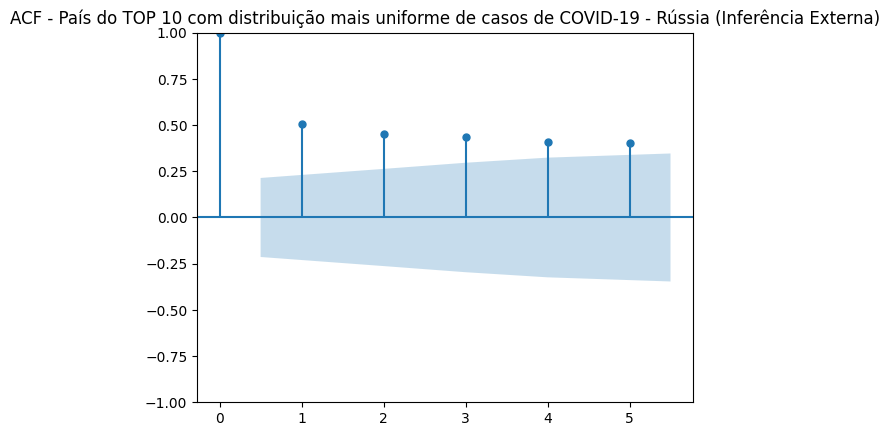

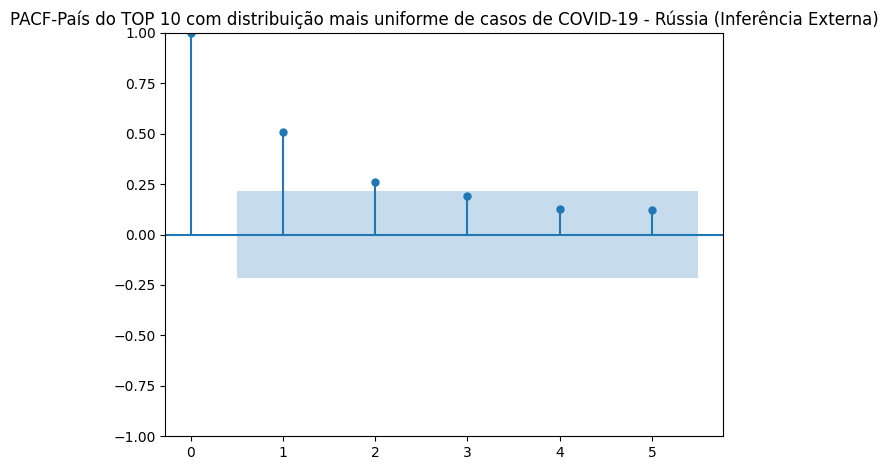

In [ ]:
#Autocorrelação (ACF) e Autocorrelação Parcial (PACF) do país da linha 138 (Rússia, inferência externa)
# Criar a figura para o gráfico de ACF
plt.figure(figsize=(8, 6))  # Tamanho do gráfico

# Plotando a autocorrelação
plot_acf(df_MM[138], lags=5)

# Adicionando título ao gráfico
plt.title("ACF - País do TOP 10 com distribuição mais uniforme de casos de COVID-19 - Rússia (Inferência Externa)")

# Plotando a autocorrelação Parcial
plot_pacf(df_MM[138], lags=5)

# Adicionando título ao gráfico
plt.title("PACF-País do TOP 10 com distribuição mais uniforme de casos de COVID-19 - Rússia (Inferência Externa)")

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Nesse país, a autocorrelação tem nível semelhante, provavelmente em razão de possuir a distribuição mais uniforme dos casos de COVID 19. Ademais, o nível de confiança também foi melhor que o anterior.

Sobre o PACF desse país, foi decrescente o nível de autocorrelação parcial. Entretanto, o nível de confiança melhorou mas não se tornou significativo no contexto geral, pois ultrapassou a rachura em apenas dois deles.

# **6. Teste KPSS - Verificação Estacionária - Diferenciação**

In [ ]:
# Criando uma instância do KPSSTest
kpss = KPSSTest()

In [ ]:
# Extração das séries temporais específicas- Estados Unidos (inferência externa)
pais_series = df_MM[35]

# Verificação se as séries precisam ser diferenciadas (com base no teste KPSS)
pais_kpss = kpss.should_diff(pais_series)
print(pais_kpss)



(0.01, True)


In [ ]:
# Extração das séries temporais específicas - Rússia (inferência externa)
pais_series2 = df_MM[138]

# Verificação se as séries precisam ser diferenciadas (com base no teste KPSS)
pais_kpss2 = kpss.should_diff(pais_series2)
print(pais_kpss2)

(0.06928644016475555, False)


A série dos Estados Unidos é estacionária, mas a da Rússia não, pois no primeiro caso o p-values é menor que 0.05, mas no segundo caso não. Logo, é importante realizar diferenciação da série temporal dos Estados Unidos.

In [ ]:
# Função de diferenciação da série temporal
def get_diff(tseries, m=1):
  diffs = []
  for t in range(m, len(tseries)):
    diffs.append(tseries.values[t] - tseries.values[t - m])

  return pd.DataFrame({f"Diff(m={m})": diffs})

**Diferenciação e Verificação das Séries**

<Axes: >

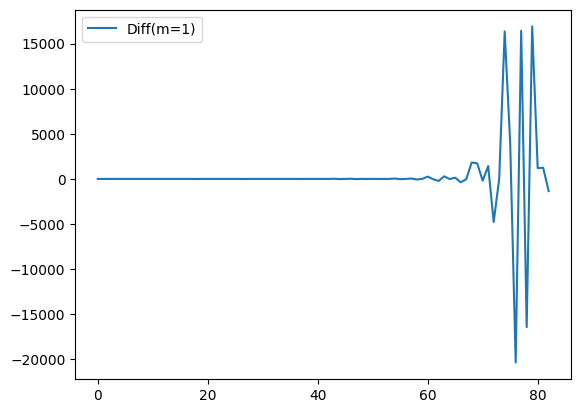

In [ ]:
# Aplicação da diferenciação para Série Temporal dos Estados Unidos
pais_diff = get_diff(pais_series)
pais_diff.plot()

In [ ]:
# verificação da estacionariedade da série já diferenciada.
print(f"pais_diff KPSS Test = {kpss.should_diff(pais_diff)}")

pais_diff KPSS Test = (0.1, False)


Portanto, a série do país com mais casos de COVID-19 foi efetivamente diferenciada.

**4.5.1 Diferenças de Diferenciação de Primeira Ordem (m=1) e de Segunda Ordem (m=2)**

<Axes: >

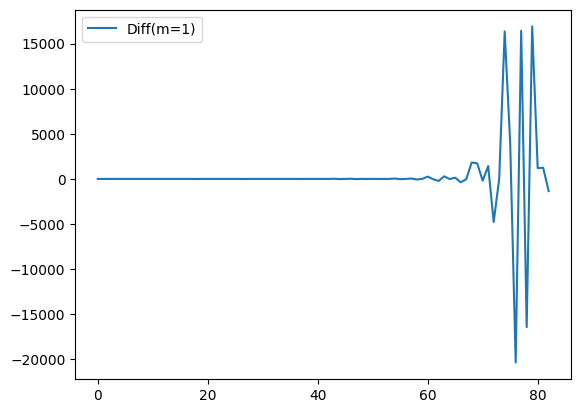

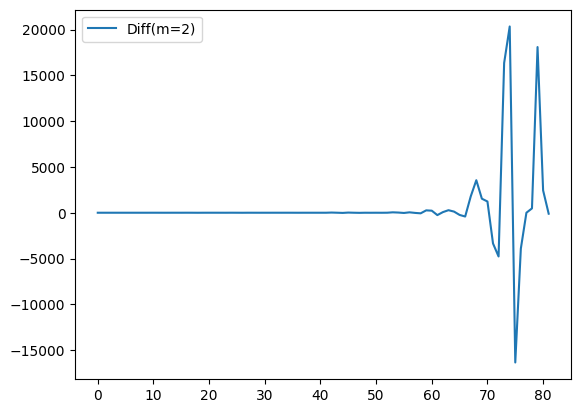

In [ ]:
# Aplicação para Série Estados Unidos
pais_diff = get_diff(pais_series)
pais_diff.plot()
pais_diff2 = get_diff(pais_series, m= 2)
pais_diff2.plot()

Plotar gráficos com a diferenciação de primeira ordem (m =1) e de segunda ordem (m =2) é importante, pois cada uma pode contribuir de formas distintas.

**Diferenciação de Primeira Ordem (m=1):**

Para cada valor de tempo, é calculado a diferença entre o valor atual e o valor imediatamente anterior. Isso ajuda a remover tendências lineares (crescimento ou decrescimento constante).

**Diferenciação de Segunda Ordem (m=2):**

Para cada valor de tempo, é calculado a diferença entre o valor atual e o valor de dois períodos atrás. Isso é útil quando a série tem uma tendência não linear ou ciclos mais complexos.

A série do país com mais casos de COVID-19 não tem tendência linear ou ciclos mais complexos. Ao contrário, permaneceu durante muito tempo com 0 casos de covid 19 e no fim, em março, teve oscilações com aumentos e diminuições de casos de covid.



<Axes: >

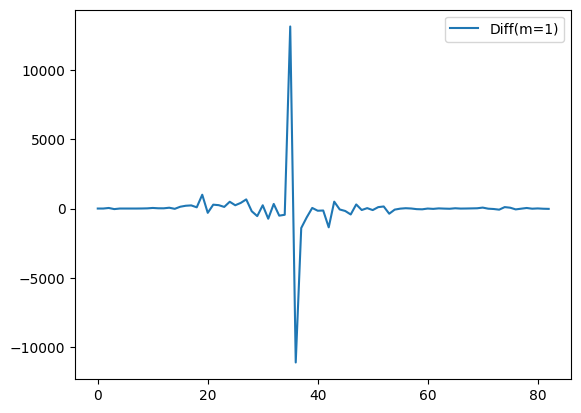

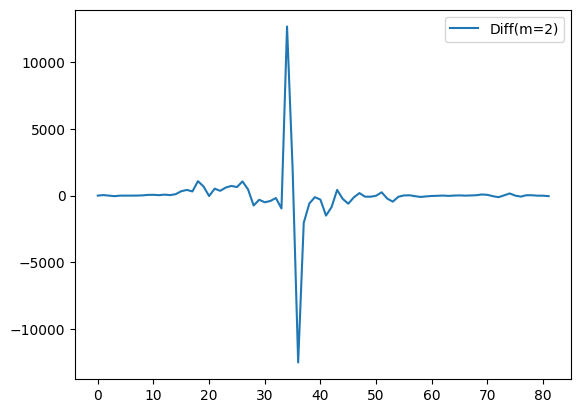

In [ ]:
# Aplicação para Série Rússia
pais_diff3 = get_diff(pais_series2)
pais_diff3.plot()
pais_diff4 = get_diff(pais_series2, m= 2)
pais_diff4.plot()

A série temporal do país com distribuição mais uniforme de casos de covid 19 ao longo do tempo - Rússia tem pequenas oscilações de aumentos e diminuições dos casos de Covid 19. Entretanto, no período 35 há uma oscilação maior.

**6.1 Correlação da Série Temporal dos "Estados Unidos" após diferenciação**

**Correlação Lags 5**

<Figure size 1000x600 with 0 Axes>

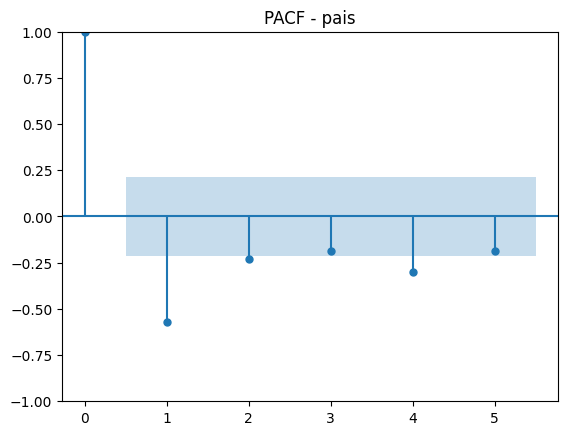

In [ ]:
# Plotando a correlação parcial para os Estados Unidos após diferenciação
plt.figure(figsize=(10, 6))
plot_pacf(pais_diff, lags=5)
plt.title("PACF - pais")
plt.show()

Após a diferenciação, a autocorrelação parcial se transformou em negativa, assim como ocorreu um pequeno aumento, pois anteriormente a PACF no ponto 3 e 4 ficaram baixas, com valor 0. Entretanto, no âmbito do nível de confiança, não houve melhoria.



<Figure size 1000x600 with 0 Axes>

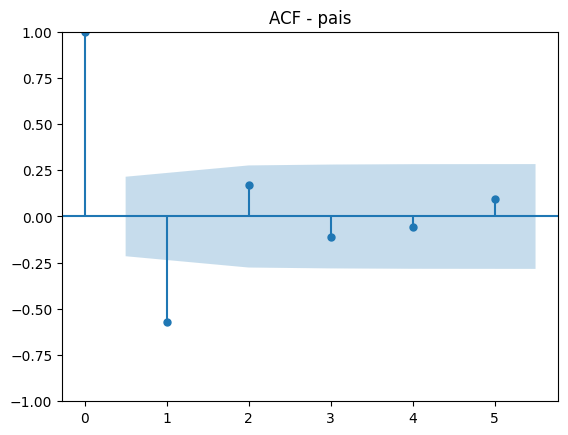

In [ ]:
# Plotando a correlação ACF para país com mais mortes
plt.figure(figsize=(10, 6))
plot_acf(pais_diff, lags=5)
plt.title("ACF - pais")
plt.show()


Após a diferenciação, a autocorrelação oscilou em negativa e positiva. No primeiro lag, a ACF ficou mais forte, mas negativa. Nas demais, houve piora da autocorrelação.

Sobre o nível de confiança, o que antes era aparente em quatro dos cinco pontos (ultrapassava o sombreamento), agora está visível em apenas um ponto. Portanto, de forma geral, ocorreu uma piora após a diferenciação.

# **7. Modelos Tradicionais**

In [ ]:
# Observação do Dataset sem análises, com transposição da coluna em linha e linha em coluna
print(df)

               0    1    2    3       4    5     6    7      8      9  ...  \
2020-01-01   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-02   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-03   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-04   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-05   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
...          ...  ...  ...  ...     ...  ...   ...  ...    ...    ...  ...   
2020-03-20   0.0  0.0  0.0  0.0  3866.0  0.0  65.0  0.0  196.0  123.0  ...   
2020-03-21   3.0  7.0  0.0  0.0  3756.0  0.0  88.0  0.0  228.0  263.0  ...   
2020-03-22   0.0  9.0  0.0  3.0  4603.0  4.0  73.0  0.0  270.0  160.0  ...   
2020-03-23   0.0  0.0  0.0  1.0  2497.0  2.0  57.0  0.0    0.0  308.0  ...   
2020-03-24  12.0  0.0  0.0  0.0  4335.0  4.0  66.0  0.0  303.0  192.0  ...   

            195   196   197  198  199   200  mv_avg  mv_avg_15 

# **7.1 Coluna do País 35 - Inferência Externa Estados Unidos**

In [ ]:
# Divisão da Série Temporal da Coluna 35 (Estados Unidos, após inferencia externa)
test_percent = 0.3
horizonte = 2
ts = pais_diff
test_size = int(len(ts) * test_percent)
X_train, X_test = ts[:-(test_size+horizonte-1)], ts[-(test_size+1):]

In [ ]:
print(ts)

    Diff(m=1)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
..        ...
78   -16420.0
79    16894.0
80     1199.0
81     1239.0
82    -1345.0

[83 rows x 1 columns]


In [ ]:
# diferentes modelos de previsão baseados em ARIMA
lag = 7 # número de defasagens (lags) que o modelo vai usar para capturar as dependências temporais nos dados (serão utilizados 7 últimos pontos da série para prever os próximos valores)
ma_model = ARIMA(X_train, order=(0, 0, lag))
ar_model = ARIMA(X_train, order=(lag, 0, 0))
arma_model = ARIMA(X_train, order=(lag, 0, lag))
arima_model = ARIMA(X_train, order=(lag, 1, lag))

ARIMA é um modelo clássico para séries temporais que incorpora componentes autorregressivos (AR), médias móveis (MA) e diferenciação (I).

O primeiro modelo ARIMA (ma_model), com ordem (0, 0, lag) possui 0 para o componente autorregressivo (AR), ou seja, não está utilizando os valores passados diretamente; 0 para a diferenciação (I), o que significa que não há necessidade de diferenciar a série temporal para torná-la estacionária. E lag para o componente de médias móveis (MA), ou seja, os erros passados (ou resíduos) estão sendo usados para melhorar as previsões futuras.

O segundo modelo ARIMA (ar_model), com ordem (lag, 0, 0) significa que está configurado para usar o componente autorregressivo (AR) com lag=7 (ou seja, os 7 valores anteriores) para prever os próximos valores, sem usar médias móveis nem diferenciação. Assim, esse modelo é um modelo AR (auto-regressivo puro), que usa apenas os lags da série para a previsão.

O terceiro modelo ARIMA (arma_model), com ordem (lag, 0, lag), significa que se usa tanto o componente autorregressivo (AR) com lag=7 como o componente de médias móveis (MA) com lag=7. Não está sendo usada a diferenciação.



In [ ]:
# ajuste do modelo Ma aos dados de treinamento e teste
ma_results = ma_model.fit()
ma_preds = ma_results.predict(start=len(X_train),
                              end=len(X_train) + len(X_test) - 1)

In [ ]:
# ajuste do modelo Ar aos dados de treinamento e teste
ar_results = ar_model.fit()
ar_preds = ar_results.predict(start=len(X_train),
                              end=len(X_train) + len(X_test) - 1)

In [ ]:
# ajuste do modelo Arma aos dados de treinamento e teste
arma_results = arma_model.fit()
arma_preds = arma_results.predict(start=len(X_train),
                                  end=len(X_train) + len(X_test) - 1)

In [ ]:
# ajuste do modelo Arima aos dados de treinamento e teste
arima_results = arima_model.fit()
arima_preds = arima_results.predict(start=len(X_train),
                                  end=len(X_train) + len(X_test) - 1)

# **7.1.1 Avaliações dos Modelos**

In [ ]:
# funções para calcular métricas de avaliação de modelos preditivos

def get_mean_squared_error(ground_truth, pred):
  return np.square(np.subtract(ground_truth, pred)).mean()

def get_root_mean_squared_error(ground_truth, pred):
  return np.sqrt(get_mean_squared_error(ground_truth, pred))

def get_mean_absolute_error(ground_truth, pred):
  return np.abs(ground_truth - pred).mean()

def get_mean_absolute_percentage_error(ground_truth, pred):
  return np.abs((ground_truth - pred) / pred).mean() * 100

def get_average_relative_error(ground_truth, pred):
  mean = np.mean(ground_truth)
  sup = np.square(np.subtract(ground_truth, pred)).sum()
  inf = np.square(np.subtract(ground_truth, mean)).sum()

  return sup / inf

def get_metrics(ground_truth, pred):
  mse = get_mean_squared_error(ground_truth, pred)
  rmse = get_root_mean_squared_error(ground_truth, pred)
  mae = get_mean_absolute_error(ground_truth, pred)
  mape = get_mean_absolute_percentage_error(ground_truth, pred)
  avr = get_average_relative_error(ground_truth, pred)

  return {"mse": mse,
          "rmse": rmse,
          "mae": mae,
          "mape": mape,
          "avr": avr}

O MSE e o RMSE penalizam erros maiores mais fortemente porque são baseados no quadrado da diferença.

O MAE fornece uma medida do erro médio sem penalizar tanto os erros maiores.

O MAPE fornece uma medida de erro relativa em termos percentuais, o que é útil quando a escala dos dados pode variar.

O AVR mede o erro em relação à média dos dados reais.

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo de média móvel (MA)
get_metrics(X_test.values.squeeze(), ma_preds.values)

{'mse': 62321594.476015285,
 'rmse': 7894.40273079701,
 'mae': 4219.82084453334,
 'mape': 633694.9392024546,
 'avr': 1.0082837315223148}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Ar
get_metrics(X_test.values.squeeze(), ar_preds.values)

{'mse': 62293749.29330158,
 'rmse': 7892.638930883737,
 'mae': 4218.812571392612,
 'mape': 118895.9847815518,
 'avr': 1.007833232061132}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Arma
get_metrics(X_test.values.squeeze(), arma_preds.values)

{'mse': 62307981.41783912,
 'rmse': 7893.540486868938,
 'mae': 4219.1296745552045,
 'mape': 50749.49323717121,
 'avr': 1.0080634896429037}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Arima
get_metrics(X_test.values.squeeze(), arima_preds.values)

{'mse': 62340177.69631604,
 'rmse': 7895.5796301675055,
 'mae': 4220.450982757364,
 'mape': 68724.62669173692,
 'avr': 1.0085843842714315}

In [ ]:
# Verificação de Valores Ausentes
print(f"X_test contains NaN: {X_test.isna().sum()}")
print(f"ar_preds contains NaN: {ar_preds.isna().sum()}")
print(f"ma_preds contains NaN: {ma_preds.isna().sum()}")
print(f"arma_preds contains NaN: {arma_preds.isna().sum()}")
print(f"arima_preds contains NaN: {arima_preds.isna().sum()}")

X_test contains NaN: Diff(m=1)    0
dtype: int64
ar_preds contains NaN: 0
ma_preds contains NaN: 0
arma_preds contains NaN: 0
arima_preds contains NaN: 0


# **7.1.2. Comparações dos Modelos**

AR: {'mse': 62293749.29330158, 'rmse': 7892.638930883737, 'mae': 4218.812571392612, 'mape': 118895.9847815518, 'avr': 1.007833232061132} 
MA: {'mse': 62321594.476015285, 'rmse': 7894.40273079701, 'mae': 4219.82084453334, 'mape': 633694.9392024546, 'avr': 1.0082837315223148} 
ARMA: {'mse': 62307981.41783912, 'rmse': 7893.540486868938, 'mae': 4219.1296745552045, 'mape': 50749.49323717121, 'avr': 1.0080634896429037} 
ARIMA: {'mse': 62340177.69631604, 'rmse': 7895.5796301675055, 'mae': 4220.450982757364, 'mape': 68724.62669173692, 'avr': 1.0085843842714315} 



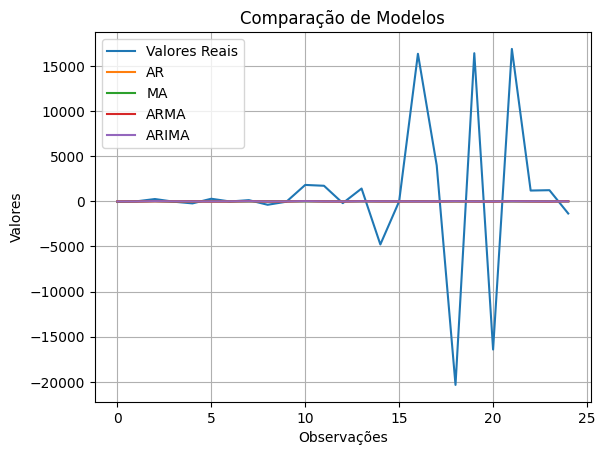

In [ ]:
#dicionário contendo as métricas de erro (como MSE, RMSE, MAE, etc.)
print(f"AR: {get_metrics(X_test.values.squeeze(), ar_preds.values)} \n" + \
      f"MA: {get_metrics(X_test.values.squeeze(), ma_preds.values)} \n" + \
      f"ARMA: {get_metrics(X_test.values.squeeze(), arma_preds.values)} \n" +\
        f"ARIMA: {get_metrics(X_test.values.squeeze(), arima_preds.values)} \n")

results = {
    "Valores Reais": X_test.values.squeeze(),
    "AR": ar_preds.values.squeeze(),
    "MA": ma_preds.values.squeeze(),
    "ARMA": arma_preds.values.squeeze(),
    "ARIMA": arima_preds.values.squeeze()
}

# Visualizações do dataframe
df_results = pd.DataFrame(results)
df_results.plot()
plt.title("Comparação de Modelos")
plt.xlabel("Observações")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

Houveram diversas tentativas para chegar nesse modelo tradicional. Primeiro, foram realizados testes com o dataset diferenciado (pais_diff)e não diferenciado (df) e o melhor resultado foi o dataset diferenciado. Todas as métricas avaliativas ficaram bem abaixo.

Também foram realizados testes com lags (5,7, 10, 15, 30). A lag 30 forneceu o melhor resultado, mas ao considerar que o dataset possui apenas 84 linhas, o risco de overfitting aumentaria, bem como aumentar a possibilidade de capturar relações irrelevantes.

Dessa forma, aplicou-se lag = 7 a fim de estruturar performances semanais ao modelo. Inclusive, quando comparado com lag = 14, a seleção do lag =7 foi positivo porque reduziu a complexidade do modelo, bem como o erro percentual relativo (MAPE) foi minimizado. Ele é bom para fazer avaliações relativas do total de casos de covid no mundo mas com cuidado, pois é importante que o modelo tenha uma boa performance em termos do erro percentual mas também não gere um erro absoluto muito grande em termos de impacto real.

Dentro dos modelos com lag 7, o melhor foi o modelo AR, pois apresentou os menores valores de MSE, RMSE e MAE, o que indica uma previsão mais precisa. Entretanto, em níveis percentuais, o melhor foi o ARMA, cujo MAPE foi 50,749.49.

Entretanto, esses resultados não são ideais, especialmente em problemas de previsão onde um erro muito grande é problemático. É de fundamental importância ajustar esses modelos para focar não apenas em minimizar o erro percentual, mas também para gerar previsões mais robustas em termos absolutos, levando em conta os impactos que erros podem ter no planejamento de saúde pública.

No âmbito desses modelos tradicionais, é importante enfatizar que a qualidade dos dados de entrada enfatizaram os problemas com as métricas: grande quantidade de 0 casos de covid em vários dias, bem como picos de mortes bem diferente do padrão.

Ademais, será analisado o comportamento do número de casos de Covid do país "Rússia", pois este teve um comportamento bem distinto dos "Estados Unidos", com a distribuição mais homogênea dos casos de covid ao longo o tempo. Por fim, serão experimentadas outras abordagens, como modelos mais complexos de Redes Neurais Profundas.

# **7.2 Coluna do País 138 - Inferência Externa Rússia**

In [ ]:
# Divisão da Série Temporal da Coluna 138 (Rússia, após inferência externa)
test_percent = 0.3
horizonte = 2
ts2 = df[138]
test_size = int(len(ts2) * test_percent)
X_train2, X_test2 = ts2[:-(test_size+horizonte-1)], ts2[-(test_size+1):]

In [ ]:
media = np.mean(df[138])
print(media)

982.6785714285714


In [ ]:
# diferentes modelos de previsão baseados em ARIMA
lag = 7 # número de defasagens (lags) que o modelo vai usar para capturar as dependências temporais nos dados (serão utilizados 5 últimos pontos da série para prever os próximos valores)
ma_model2 = ARIMA(X_train2, order=(0, 0, lag))
ar_model2 = ARIMA(X_train2, order=(lag, 0, 0))
arma_model2 = ARIMA(X_train2, order=(lag, 0, lag))
arima_model2 = ARIMA(X_train2, order=(lag, 1, lag))

In [ ]:
# ajuste do modelo Ma aos dados de treinamento e teste
ma_results2 = ma_model2.fit()
ma_preds2 = ma_results2.predict(start=len(X_train2),
                              end=len(X_train2) + len(X_test2) - 1)
# ajuste do modelo Ar aos dados de treinamento e teste
ar_results2 = ar_model2.fit()
ar_preds2 = ar_results2.predict(start=len(X_train2),
                              end=len(X_train2) + len(X_test2) - 1)
# ajuste do modelo Arma aos dados de treinamento e teste
arma_results2 = arma_model2.fit()
arma_preds2 = arma_results2.predict(start=len(X_train2),
                                  end=len(X_train2) + len(X_test2) - 1)
# ajuste do modelo Arima aos dados de treinamento e teste
arima_results2 = arima_model2.fit()
arima_preds2 = arima_results2.predict(start=len(X_train2),
                                  end=len(X_train2) + len(X_test2) - 1)

# **7.2.1 Avaliações dos Modelos**

In [ ]:
# funções para calcular métricas de avaliação de modelos preditivos

def get_mean_squared_error(ground_truth, pred):
  return np.square(np.subtract(ground_truth, pred)).mean()

def get_root_mean_squared_error(ground_truth, pred):
  return np.sqrt(get_mean_squared_error(ground_truth, pred))

def get_mean_absolute_error(ground_truth, pred):
  return np.abs(ground_truth - pred).mean()

def get_mean_absolute_percentage_error(ground_truth, pred):
  return np.abs((ground_truth - pred) / pred).mean() * 100

def get_average_relative_error(ground_truth, pred):
  mean = np.mean(ground_truth)
  sup = np.square(np.subtract(ground_truth, pred)).sum()
  inf = np.square(np.subtract(ground_truth, mean)).sum()

  return sup / inf

def get_metrics(ground_truth, pred):
  mse = get_mean_squared_error(ground_truth, pred)
  rmse = get_root_mean_squared_error(ground_truth, pred)
  mae = get_mean_absolute_error(ground_truth, pred)
  mape = get_mean_absolute_percentage_error(ground_truth, pred)
  avr = get_average_relative_error(ground_truth, pred)

  return {"mse": mse,
          "rmse": rmse,
          "mae": mae,
          "mape": mape,
          "avr": avr}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo de média móvel (MA)
get_metrics(X_test2.values.squeeze(), ma_preds2.values)

{'mse': 1512276.2650352928,
 'rmse': 1229.7464230626138,
 'mae': 1215.50807658052,
 'mape': 93.84338313858694,
 'avr': 695.7991696163864}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Ar
get_metrics(X_test2.values.squeeze(), ar_preds2.values)

{'mse': 1094196.761670586,
 'rmse': 1046.0386042926839,
 'mae': 1019.8023719358569,
 'mape': 92.73507078894492,
 'avr': 503.4405523448223}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Arma
get_metrics(X_test2.values.squeeze(), arma_preds2.values)

{'mse': 2051655.6086189738,
 'rmse': 1432.360153250213,
 'mae': 1173.8616895185662,
 'mape': 148.25442298739503,
 'avr': 943.9679123592992}

In [ ]:
# métricas de avaliação para as previsões feitas pelo modelo Arima
get_metrics(X_test2.values.squeeze(), arima_preds2.values)

{'mse': 33220.02686860774,
 'rmse': 182.26361915809676,
 'mae': 175.01118818052038,
 'mape': 69.45363110819305,
 'avr': 15.2845532554013}

In [ ]:
# Verificação de Valores Ausentes
print(f"X_test contains NaN: {X_test2.isna().sum()}")
print(f"ar_preds contains NaN: {ar_preds2.isna().sum()}")
print(f"ma_preds contains NaN: {ma_preds2.isna().sum()}")
print(f"arma_preds contains NaN: {arma_preds2.isna().sum()}")
print(f"arima_preds contains NaN: {arima_preds2.isna().sum()}")

X_test contains NaN: 0
ar_preds contains NaN: 0
ma_preds contains NaN: 0
arma_preds contains NaN: 0
arima_preds contains NaN: 0


# **7.2.2. Comparações dos Modelos**

AR: {'mse': 1094196.761670586, 'rmse': 1046.0386042926839, 'mae': 1019.8023719358569, 'mape': 92.73507078894492, 'avr': 503.4405523448223} 
MA: {'mse': 1512276.2650352928, 'rmse': 1229.7464230626138, 'mae': 1215.50807658052, 'mape': 93.84338313858694, 'avr': 695.7991696163864} 
ARMA: {'mse': 2051655.6086189738, 'rmse': 1432.360153250213, 'mae': 1173.8616895185662, 'mape': 148.25442298739503, 'avr': 943.9679123592992} 
ARIMA: {'mse': 33220.02686860774, 'rmse': 182.26361915809676, 'mae': 175.01118818052038, 'mape': 69.45363110819305, 'avr': 15.2845532554013} 



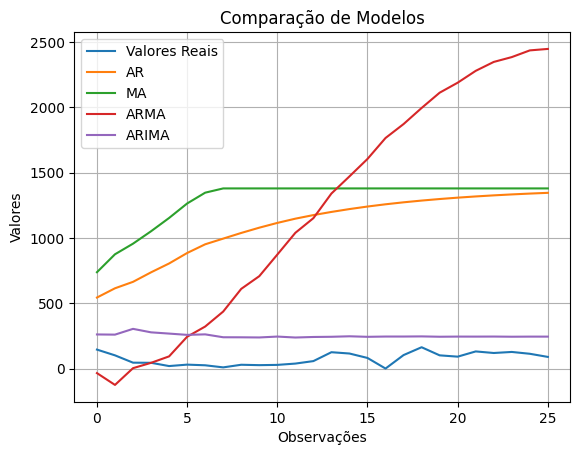

In [ ]:
#dicionário contendo as métricas de erro (como MSE, RMSE, MAE, etc.)
print(f"AR: {get_metrics(X_test2.values.squeeze(), ar_preds2.values)} \n" + \
      f"MA: {get_metrics(X_test2.values.squeeze(), ma_preds2.values)} \n" + \
      f"ARMA: {get_metrics(X_test2.values.squeeze(), arma_preds2.values)} \n" +\
        f"ARIMA: {get_metrics(X_test2.values.squeeze(), arima_preds2.values)} \n")

results = {
    "Valores Reais": X_test2.values.squeeze(),
    "AR": ar_preds2.values.squeeze(),
    "MA": ma_preds2.values.squeeze(),
    "ARMA": arma_preds2.values.squeeze(),
    "ARIMA": arima_preds2.values.squeeze()
}

# Visualizações do dataframe
df_results = pd.DataFrame(results)
df_results.plot()
plt.title("Comparação de Modelos")
plt.xlabel("Observações")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

**Analise Comparativa**

Também aplicou-se lag = 7 a fim de capturar comportamentos semanais
ao modelo.

O modelo ARIMA foi o melhor modelo, especialmente devido ao seu MAPE de 69.45%, que é o menor, seguido de MSE, RMSE e MAE igualmente mais baixos.

MSE: 33.220,03 - O MSE é uma métrica comum para avaliar a precisão de um modelo, e um valor tão baixo quando comparado com a média dos dados (982.6785714285714) indica que o ARIMA fez previsões com erros quadráticos relativamente pequenos. Isso significa que, em média, as previsões ficaram bem próximas dos valores reais.

RMSE: 182,26 - O RMSE fornece a magnitude média dos erros. Um valor de 182,26 sugere que os erros nas previsões do modelo foram de tamanho moderado, o que é uma boa indicação de acuracidade.

MAE: 175,01 - O MAE mostra a média dos erros absolutos. O fato de o ARIMA ter um MAE de 175,01 mostra que ele teve um desempenho razoável em termos de previsões próximas ao valor real, sem grandes discrepâncias.

MAPE: 69,45% - ele é uma medida para entender o erro percentual médio do modelo. É alto, principalmente quando a previsão tem possibilidade de ter 69,25 % de erro.

Novamente esses resultado não são ideais, especialmente em problemas de previsão onde um erro muito grande é problemático. É de fundamental importância ajustar esses modelos para focar não apenas em minimizar o erro percentual, mas também para gerar previsões mais robustas em termos absolutos, levando em conta os impactos que erros podem ter no planejamento de saúde pública.



# **8.Redes Neurais Profundas**

# **8.1 Redes Neurais Profundas - TSAI**

In [ ]:
# Definindo o dataset 'Covid3Month'
dsid = 'Covid3Month'
X, y, splits = get_regression_data(dsid, split_data=False)

X      - shape: [201 samples x 1 features x 84 timesteps]  type: memmap  dtype:float64  isnan: 0
y      - shape: (201,)  type: memmap  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [140, 61]  overlap: False


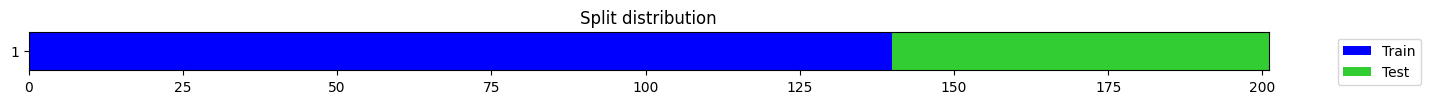

In [ ]:
#Formatação e Verificação dos dados para treinamento
check_data(X, y, splits)

A forma de X é 201 samples x 1 features x 84 timesteps, que significa que para cada um dos 201 países (amostras), há 84 passos de tempo e 1 característica (número de casos de COVID). Logo, como há a observação do número de casos de COVID-19 para cada país ao longo do tempo, então seria uma análise univariada, pois há 1 variável (casos de COVID) para cada país.


In [ ]:
tfms = [None, [TSRegression()]] #pré-processamento para tarefas de regressão: None: x; aplicável a variável Y
batch_tfms = TSStandardize(by_sample=True, by_var=True) # transformação das séries temporais.
dls = get_ts_dls(X, y, splits, tfms=tfms, batch_tfms=batch_tfms, bs=7) #prepara e carrega os dados para treinamento e teste. #obs: define o tamanho do lote (batch size)
dls.one_batch() #processamento do primeiro lote de dados

(TSTensor(samples:7, vars:1, len:84, device=cpu, dtype=torch.float32),
 tensor([0.0630, 0.0286, 0.1111, 0.0289, 0.1111, 0.0000, 0.0368]))

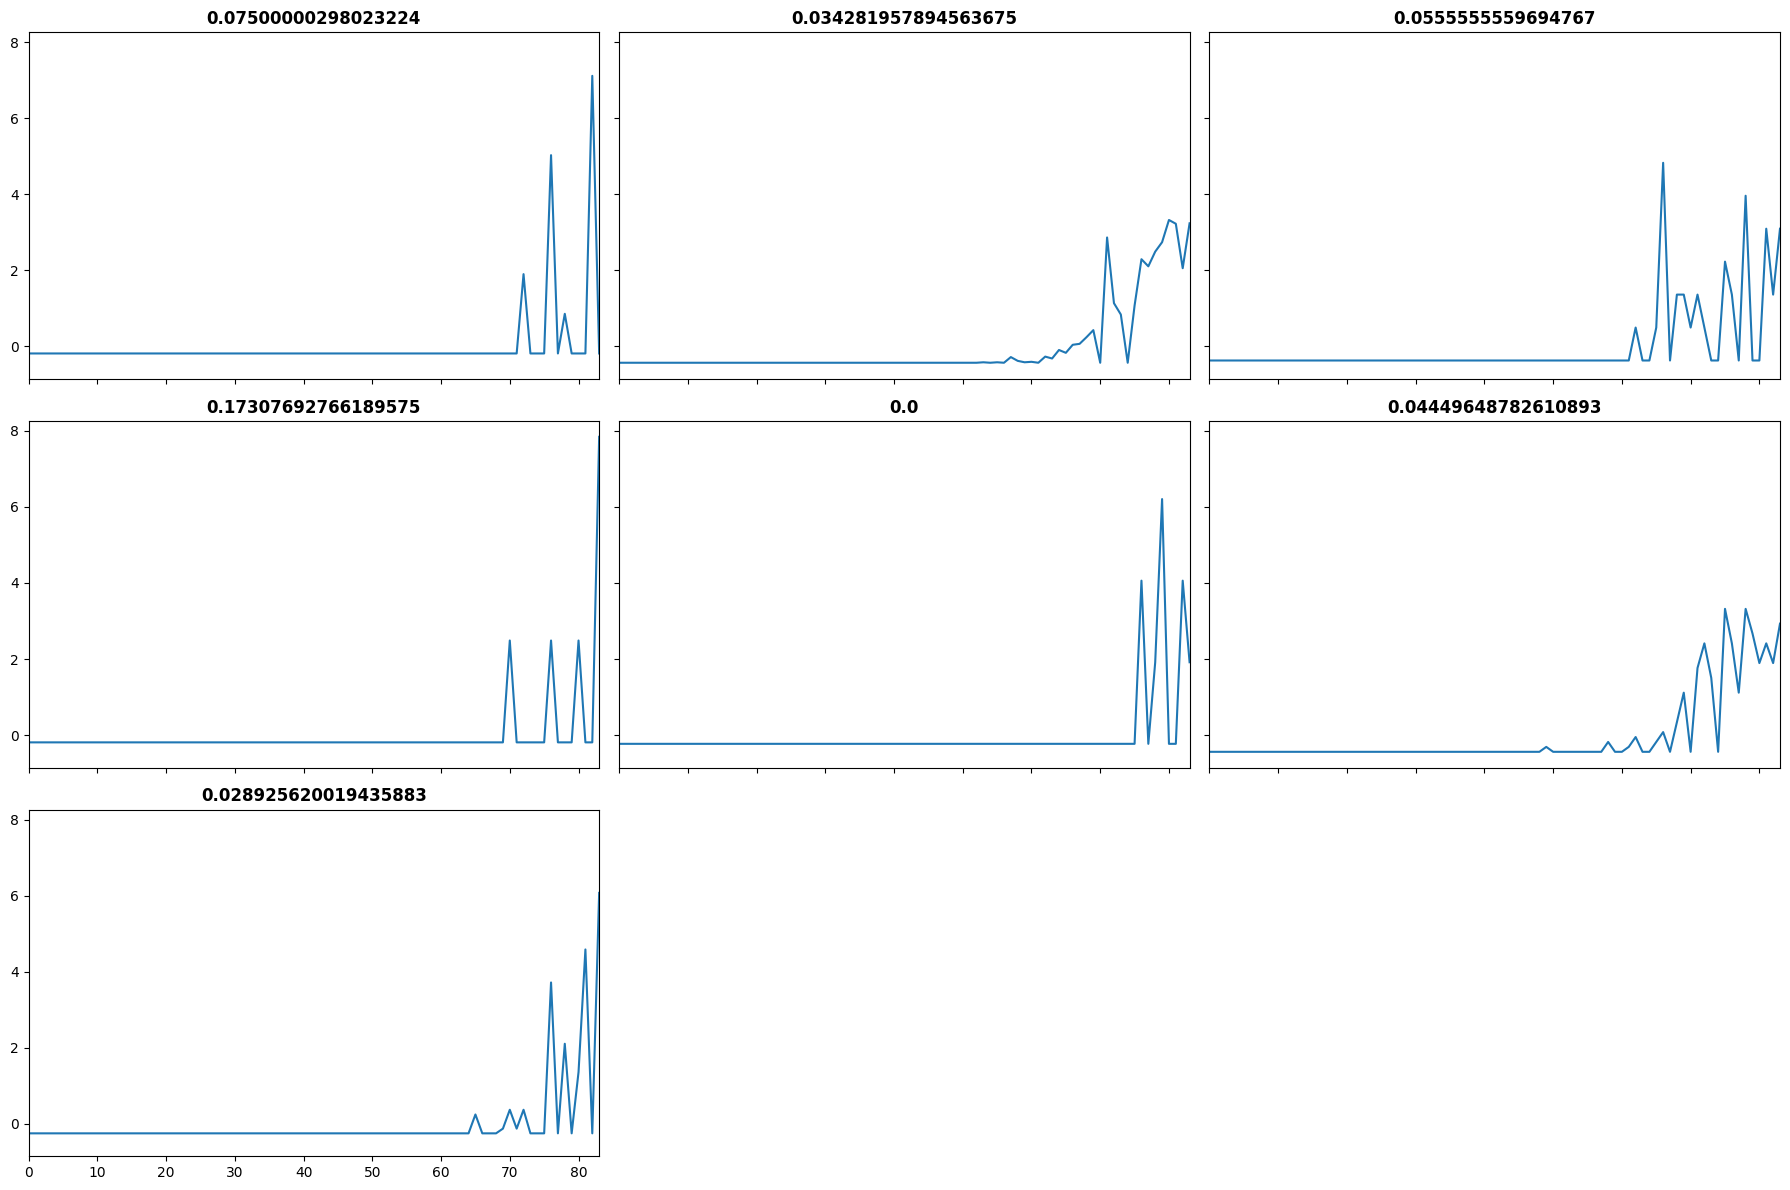

In [ ]:
dls.show_batch(sharey=True) # exibição de gráficos de todas as séries temporais do lote

**LSTM**

SuggestedLRs(valley=6.30957365501672e-05)

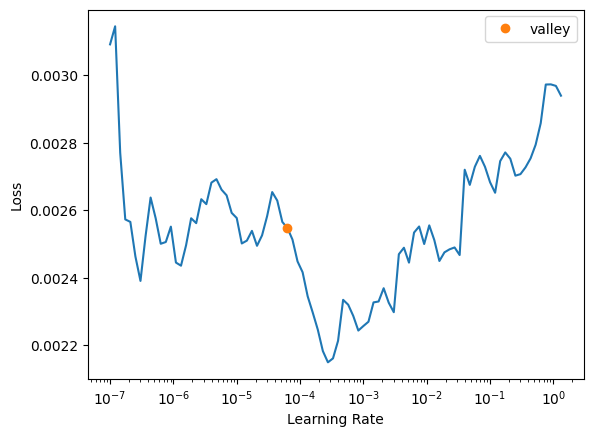

In [ ]:
 # busca pela taxa de aprendizado (learning rate) mais eficaz
learn = ts_learner(dls, LSTM, metrics=[mae, rmse]) # função que cria e configura o modelo de aprendizado. Arquitetura: LSTM
learn.lr_find()

In [ ]:
# Treinando o modelo com o learning rate
learn.fit_one_cycle(100, lr_max=6.30957365501672e-05)
#Train_loss - perda calculada durante o treinamento do modelo. # valid_loss - perda calculada com base em um conjunto de validação (verificar boa generalização)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.001904,0.002001,0.034503,0.044727,00:00
1,0.001789,0.001870,0.034220,0.043246,00:00
2,0.001787,0.001777,0.033293,0.042159,00:00
3,0.001738,0.001862,0.030429,0.043153,00:00
4,0.001672,0.001813,0.031123,0.042583,00:00
5,0.001689,0.001924,0.031420,0.043859,00:00
6,0.001704,0.001735,0.031605,0.041657,00:00
7,0.001755,0.002086,0.032518,0.045668,00:00
8,0.001799,0.001788,0.031885,0.042288,00:00
9,0.001912,0.002625,0.035083,0.051230,00:00


O modelo LSTM apresentou um bom desempenho durante as épocas. É importante analisar as perdas e as métricas.

**Loss de Treinamento:** a perda nos dados de treinamento diminuiu gradualmente ao longo do tempo, o que indica que o modelo está melhorando suas previsões nos dados de treinamento.

**Loss de Validação:**a perda nos dados de validação flutuou um pouco e há momentos em que a perda de validação aumenta (por exemplo, nas épocas 15 e 48), o que pode sugerir overfitting (quando o modelo começa a se ajustar demais aos dados de treinamento e não generalizar bem para dados novos).

**MAE (Erro Absoluto Médio):** este valor também flutua um pouco, mas geralmente fica em torno de 0,03 a 0,04, indicando que o erro médio entre as previsões e os valores reais é de cerca de 3-4%.

**RMSE (Erro Quadrático Médio):** o RMSE segue um padrão semelhante ao MAE, com flutuações, mas em geral fica entre 0,04 e 0,05. Este é outro indicador de como o modelo está se saindo, sendo sensível a erros maiores devido à sua natureza de quadrar os valores.

**Tempo:**a coluna de tempo está constante como 00:00, o que mostra que cada época foi processada em um período muito curto, indicando que o processo de treinamento é rápido.

Nesse contexto, devido a possibilidade de overfitting, é importante em futuros treinamentos experimentar técnicas como early stopping, agendamento da taxa de aprendizado ou regularização e validação cruzada para buscar resolver esse problema. Sobre as métricas de erro (MAE & RMSE) parecem estabilizar, com pequenas flutuações, o que é geralmente um sinal de que o modelo está convergindo, mas ainda pode ser otimizado para uma melhor generalização.




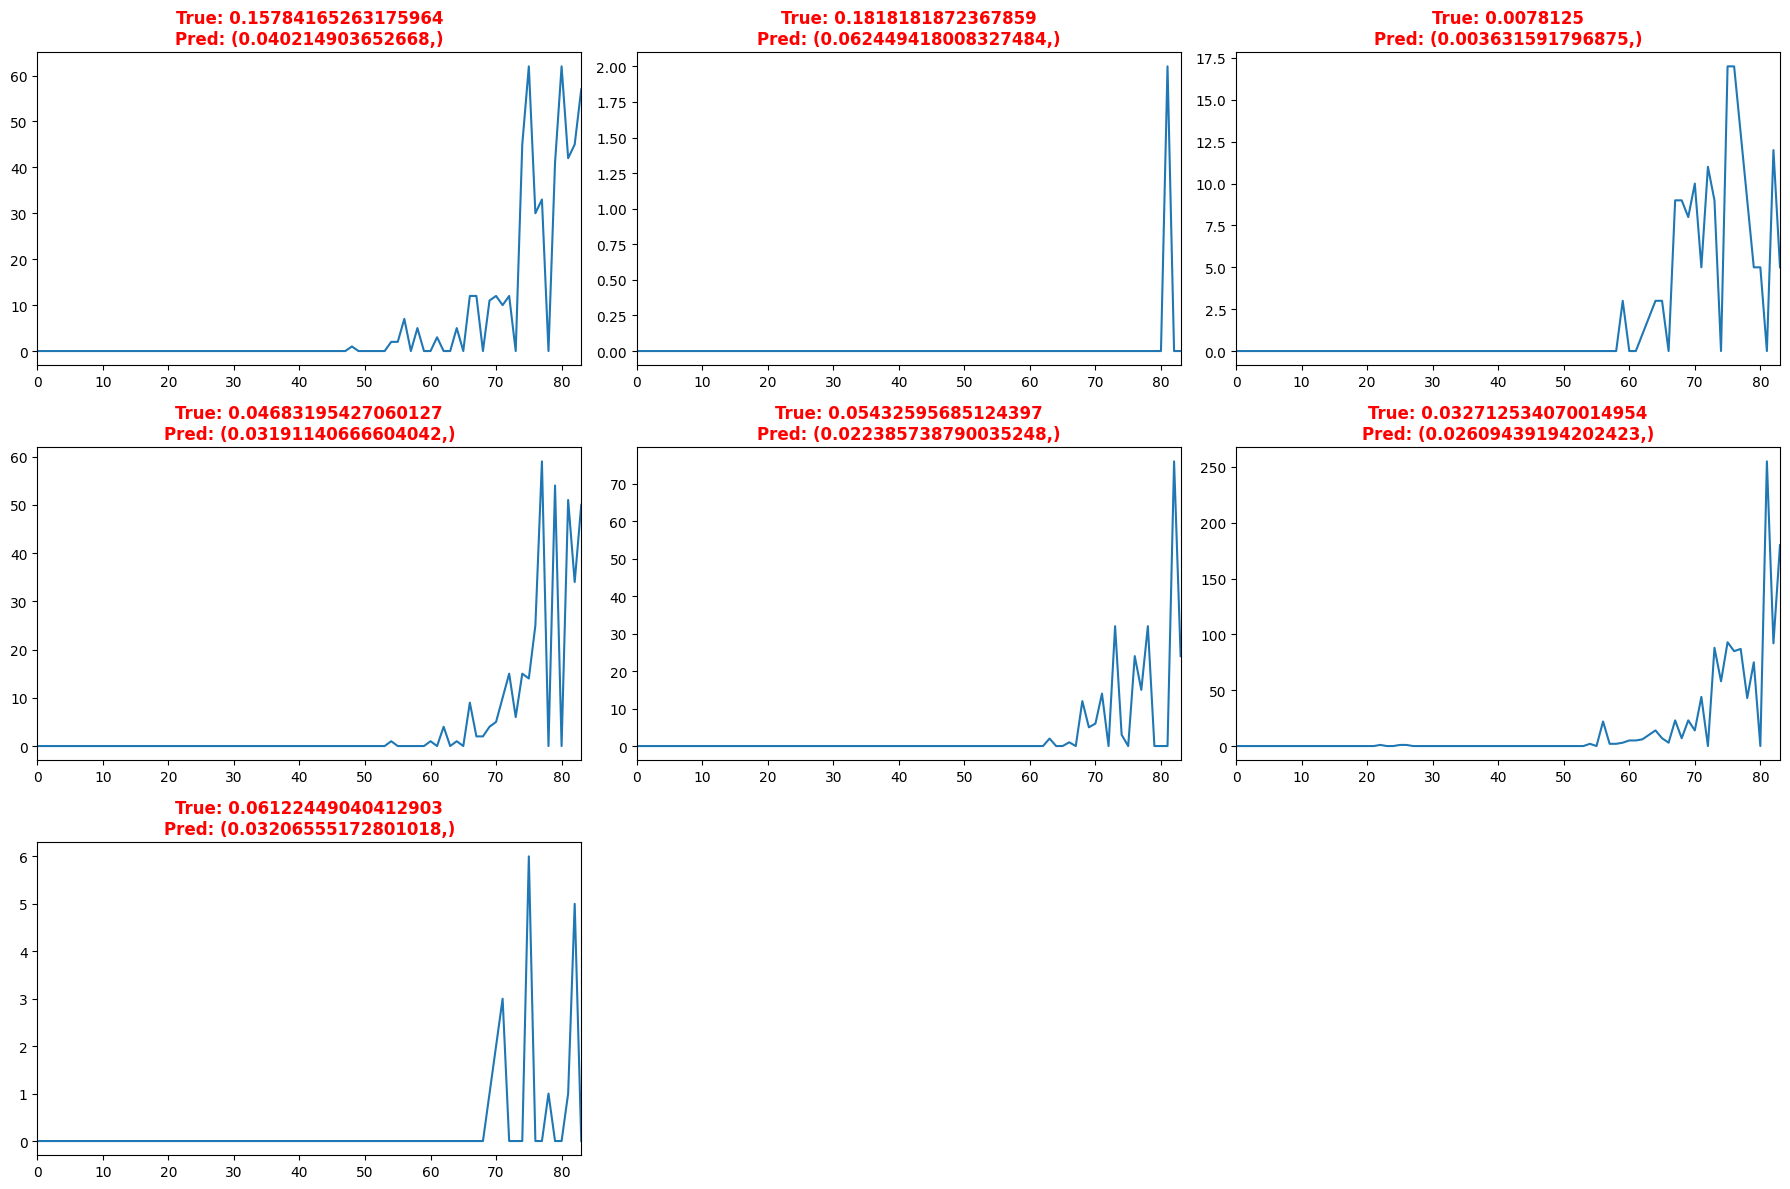

In [ ]:
learn.show_results() #exibe os resultados das previsões do modelo em comparação com os valores reais

**GRU (Gated Recurrent Unit)**

SuggestedLRs(valley=0.0020892962347716093)

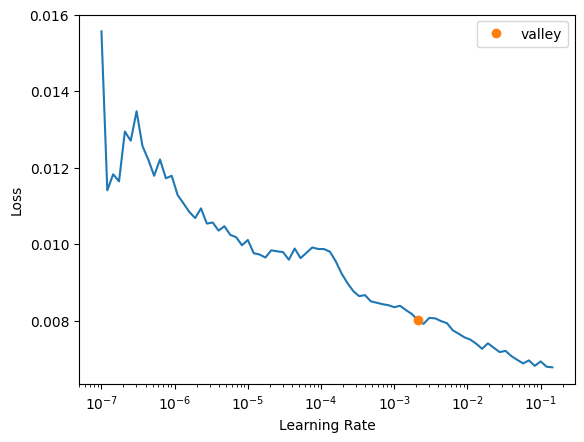

In [ ]:
learn = ts_learner(dls, GRU, metrics=[mae, rmse], cbs=[ShowGraph()])
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.024720,0.066133,0.121409,0.257164,00:03
1,0.021400,0.059964,0.116840,0.244875,00:02
2,0.020317,0.067679,0.125342,0.260152,00:02
3,0.020002,0.063507,0.125736,0.252006,00:02
4,0.022705,0.057443,0.097769,0.239673,00:02
5,0.022186,0.061889,0.123549,0.248774,00:02
6,0.021535,0.063316,0.144026,0.251627,00:02
7,0.029292,0.118130,0.259627,0.343701,00:01
8,0.035393,0.064069,0.128959,0.253119,00:02
9,0.034266,0.073172,0.132694,0.270504,00:02


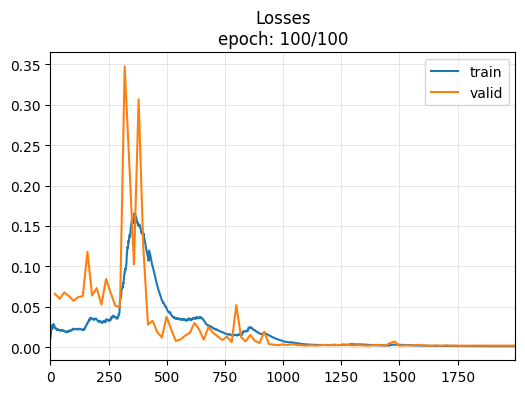

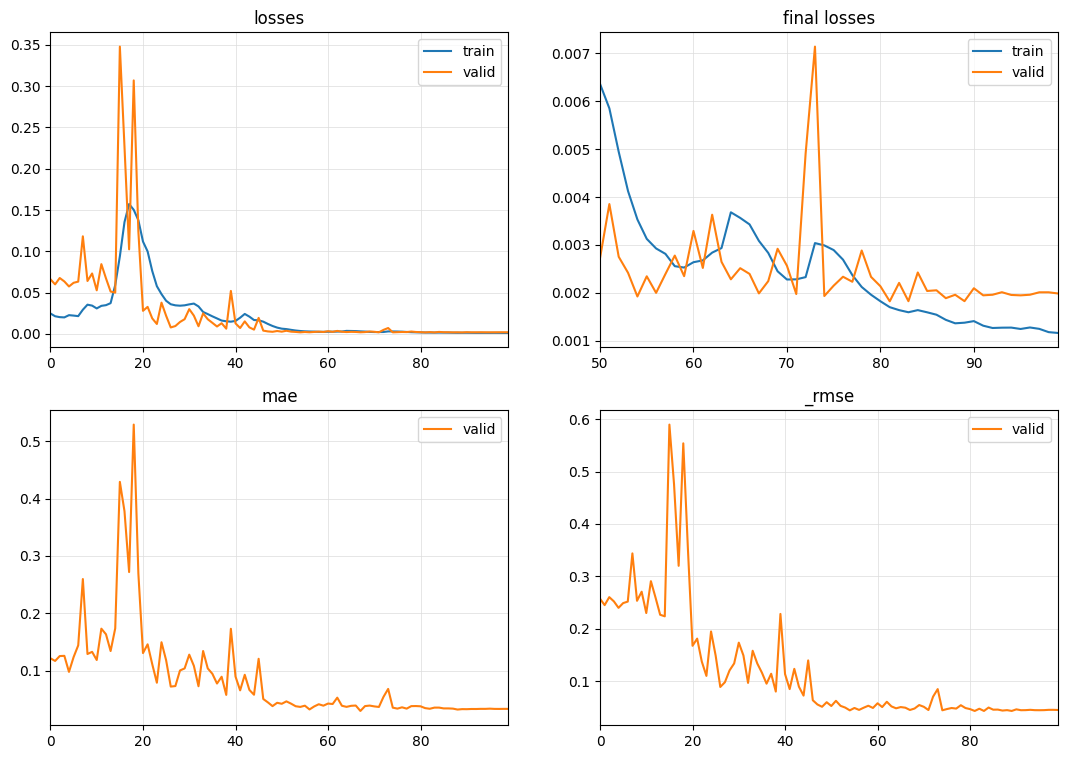

In [ ]:
learn.fit_one_cycle(100, lr_max=0.0020892962347716093)

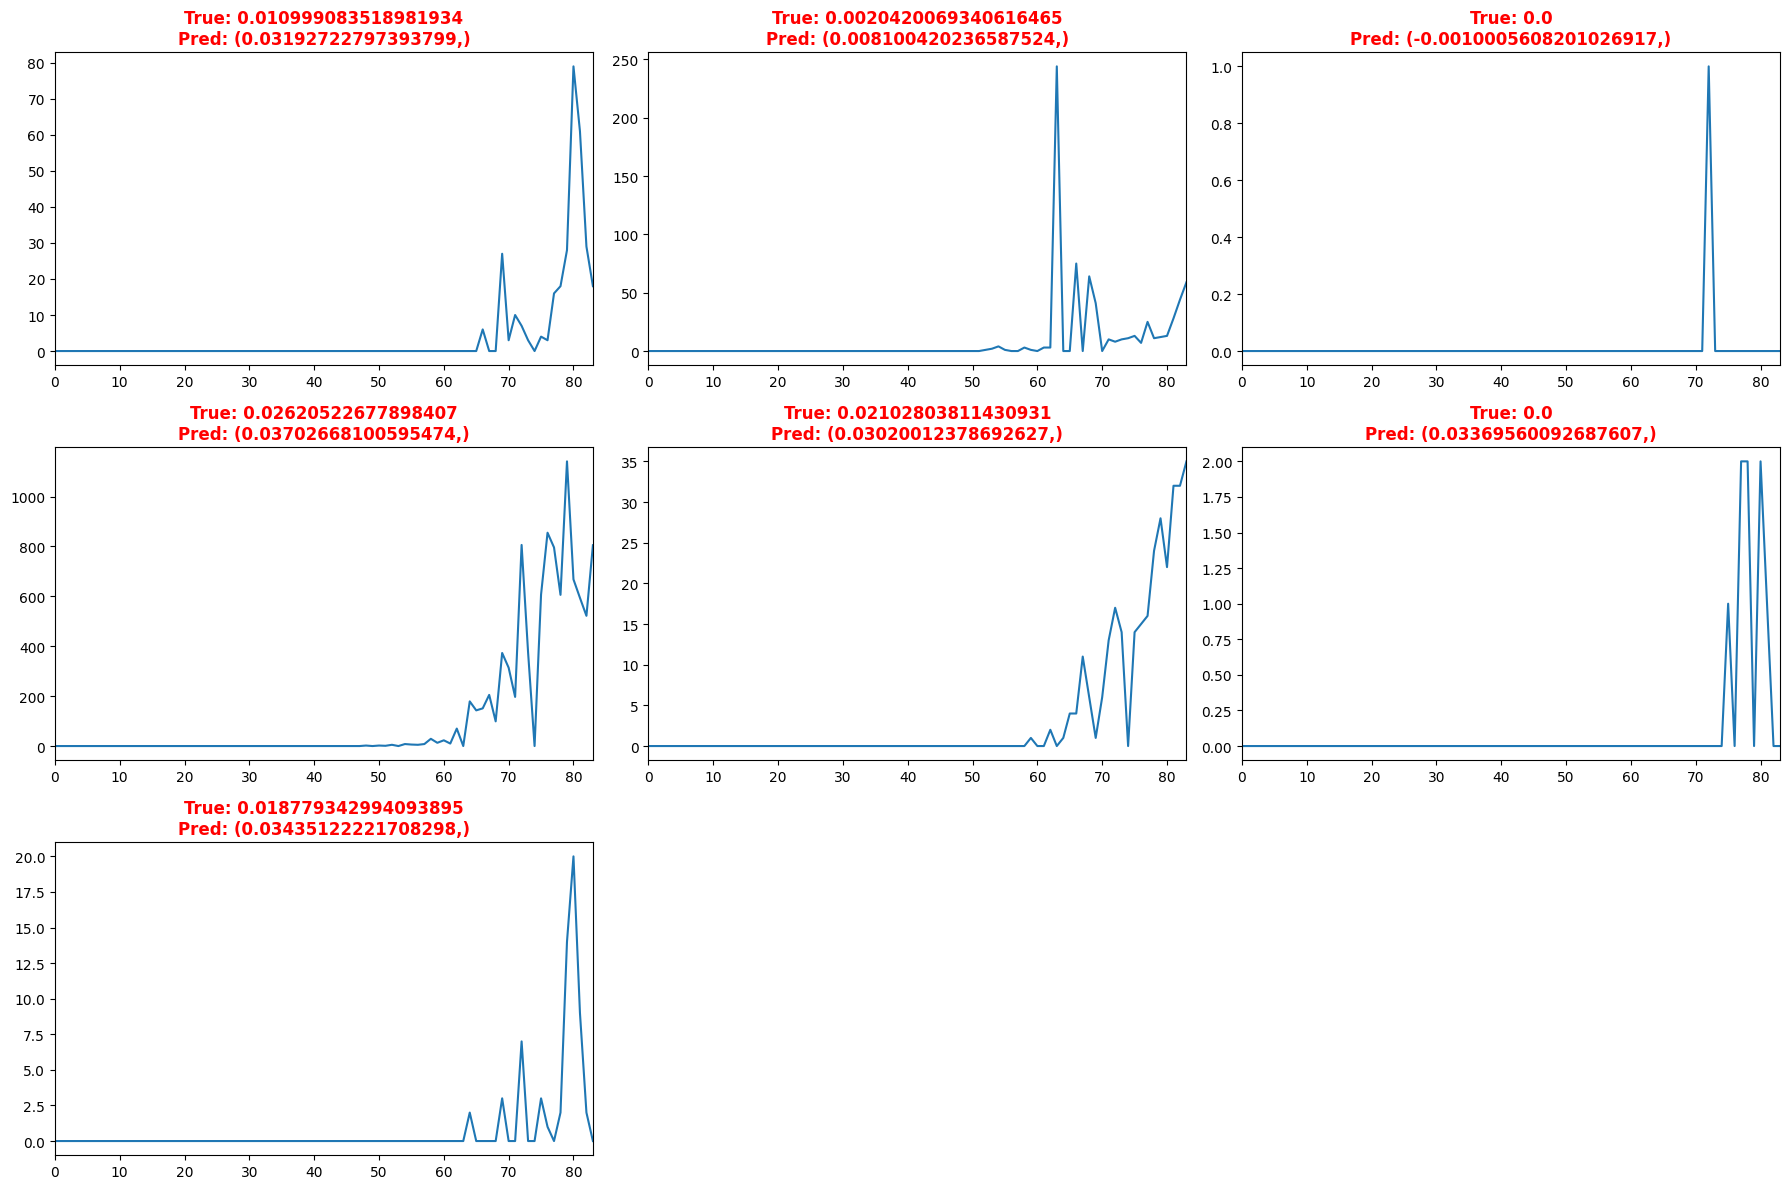

In [ ]:
learn.show_results()

O modelo GRU apresentou diminuição Constante da Perda de Treinamento, com algumas oscilações. Isso indica que o modelo está aprendendo com os dados e ajustando os parâmetros de forma eficaz.

Também houve flutuação na Perda de Validação: especialmente nas épocas 15, 18 e 72, mas no geral ela diminui. Essas flutuações podem ser um sinal de que o modelo pode estar começando a overfit em algumas épocas, mas no geral o desempenho está se estabilizando.

MAE e RMSE: Ambas as métricas estão diminuindo de forma constante, o que é uma boa indicação de que o modelo está fazendo previsões com menor erro ao longo do tempo.

Nesse contexto, para futuras melhorias é importante aplicar técnicas como early stopping e regularização (L2 regularization).

Apesar de ter sido um bom modelo, o LSTM ainda apresentou melhores métricas (mae e rmse), se configurando como o melhor modelo dentre os dois mencionados.



**RESNET**

SuggestedLRs(valley=0.00015848931798245758)

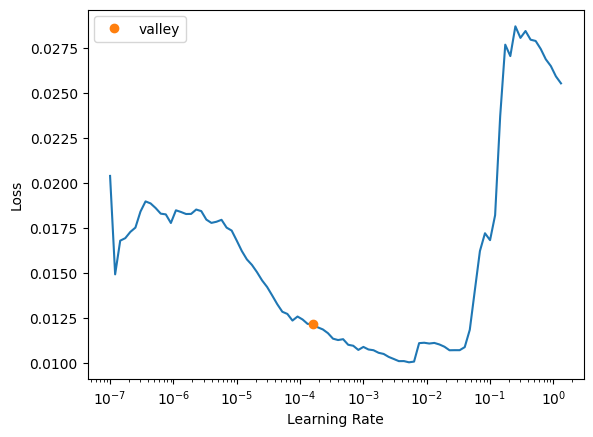

In [ ]:
learn = ts_learner(dls, ResNet, metrics=[mae, rmse])
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.001378,0.001997,0.033720,0.044684,00:02
1,0.001282,0.002024,0.032908,0.044993,00:02
2,0.001288,0.002034,0.032996,0.045104,00:02
3,0.001274,0.002138,0.033127,0.046236,00:03
4,0.001256,0.002091,0.033086,0.045730,00:02
5,0.001215,0.002006,0.033186,0.044794,00:02
6,0.001171,0.002058,0.033294,0.045370,00:02
7,0.001136,0.002129,0.033631,0.046140,00:03
8,0.001192,0.002070,0.033964,0.045496,00:02
9,0.001182,0.002244,0.035281,0.047367,00:02


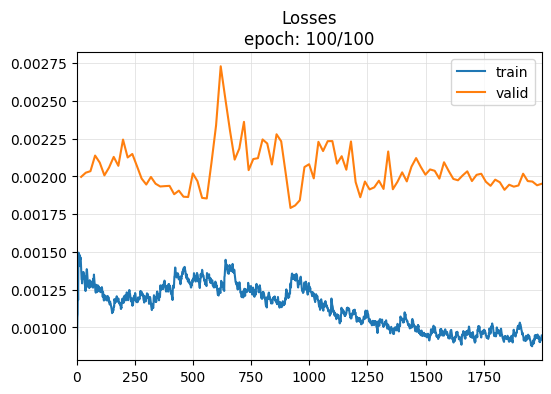

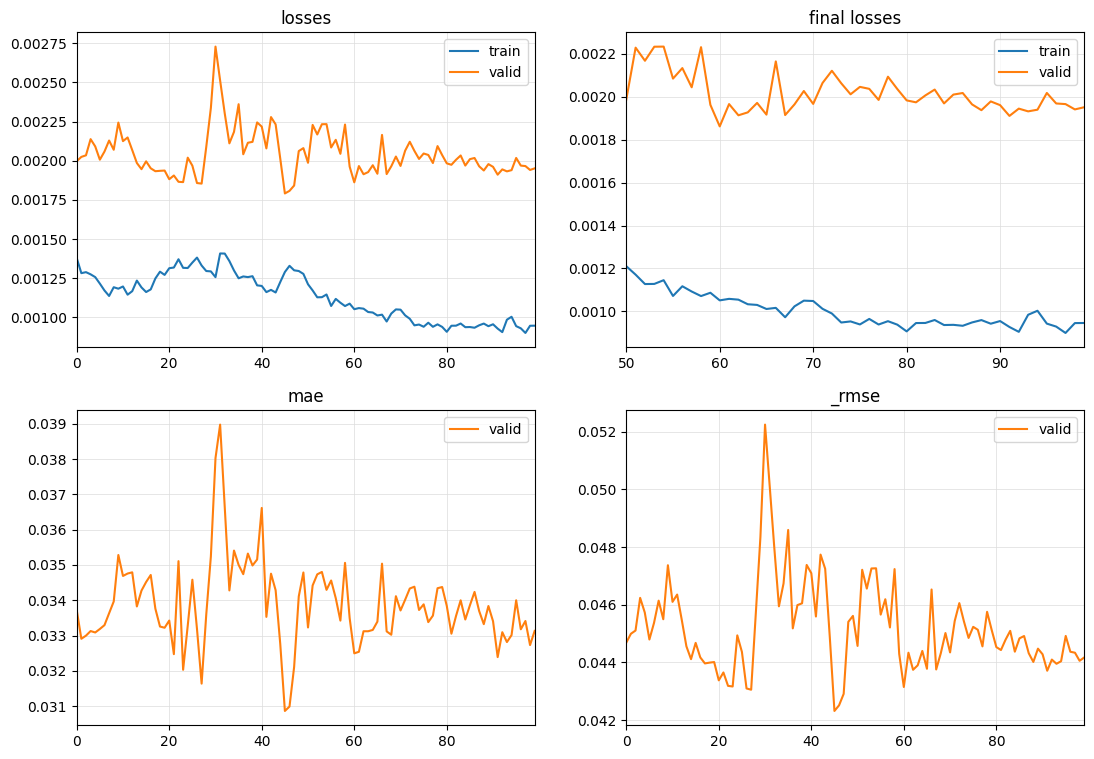

In [ ]:
learn.fit_one_cycle(100, lr_max=0.00015848931798245758)

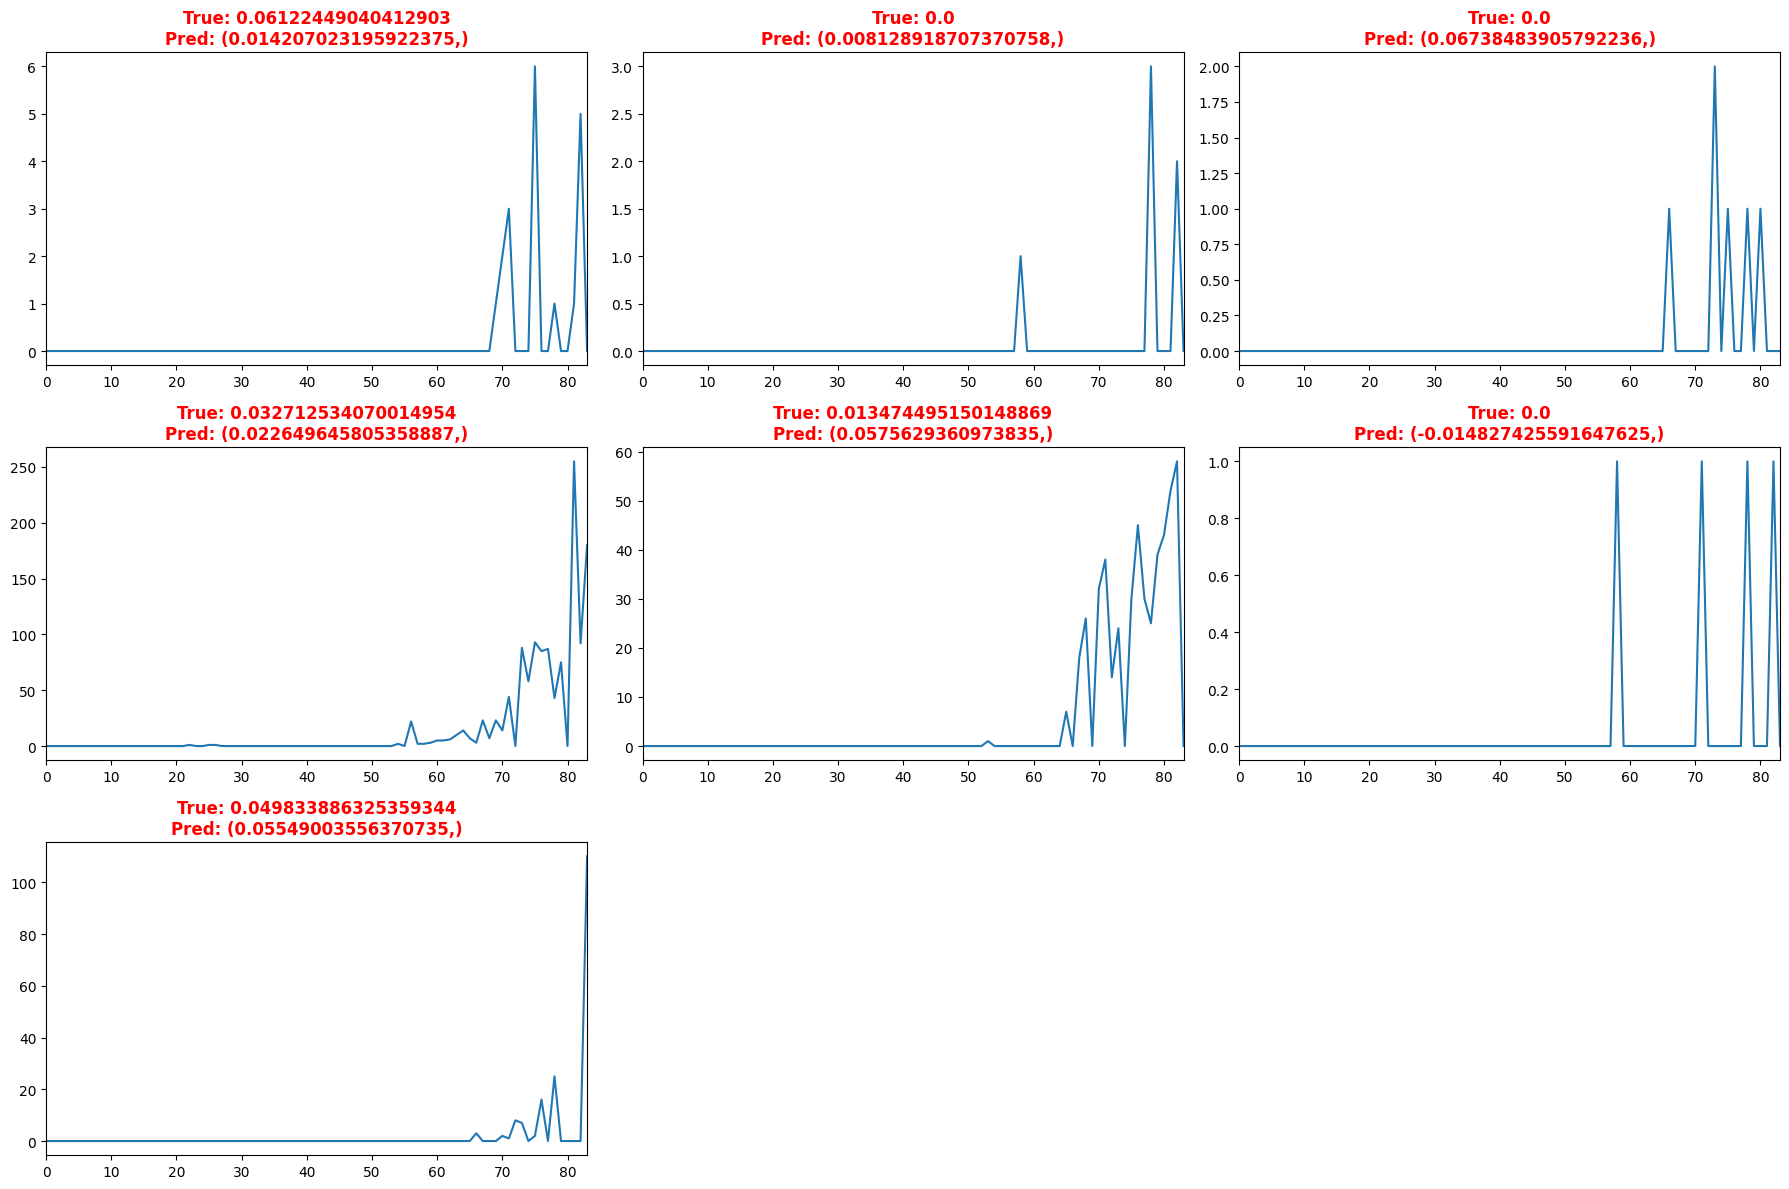

In [ ]:
learn.show_results()

Este modelo está aprendendo, apresentou um bom desempenho. Ele começou no treinamento em 0.001378 e diminuiu gradualmente até 0.000946 no final do 99º episódio.

A Loss de Validação, entretanto, apresentou algumas flutuações, o que é normal durante o treinamento, já que o modelo nem sempre generaliza perfeitamente. Começou em 0.001997 e terminou em 0.001951 no 99º episódio.

MAE (Erro Absoluto Médio): Mostra o quão próximas as previsões do modelo estão dos valores reais. Começou em 0.033720 e manteve-se em torno desse valor, terminando em 0.033132 no final do treinamento.

RMSE (Raiz do Erro Quadrático Médio): Este valor indica a magnitude do erro das previsões. Começou em 0.044684 e terminou em 0.044172 no 99º episódio.

Embora a loss de treinamento diminua constantemente, a loss de validação apresenta algumas variações, o que é esperado.

Quando comparado com os outros modelos, o LSTM ainda apresentou melhores métricas (mae e rmse).

**InceptionTime**

SuggestedLRs(valley=0.0003311311302240938)

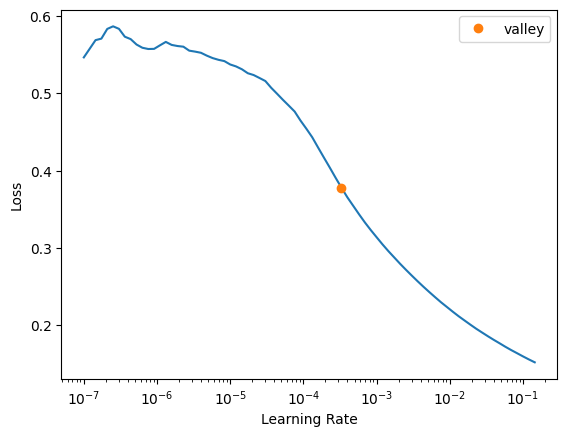

In [ ]:
learn = ts_learner(dls,InceptionTime, metrics=[mae, rmse], cbs=[ShowGraph()])
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.000945,0.002027,0.033810,0.045017,00:02
1,0.000959,0.002063,0.034182,0.045422,00:02
2,0.000989,0.002071,0.034634,0.045510,00:02
3,0.000984,0.002008,0.034138,0.044815,00:03
4,0.000978,0.001975,0.033735,0.044440,00:02
5,0.000952,0.001991,0.033662,0.044622,00:02
6,0.000916,0.001955,0.033038,0.044215,00:02
7,0.000924,0.001902,0.031788,0.043612,00:02
8,0.001000,0.001968,0.033147,0.044366,00:02
9,0.000983,0.001907,0.032891,0.043671,00:02


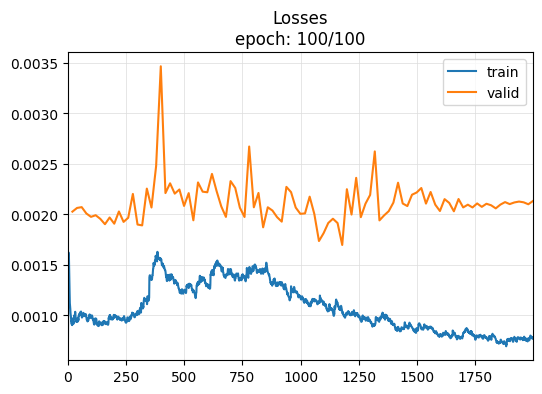

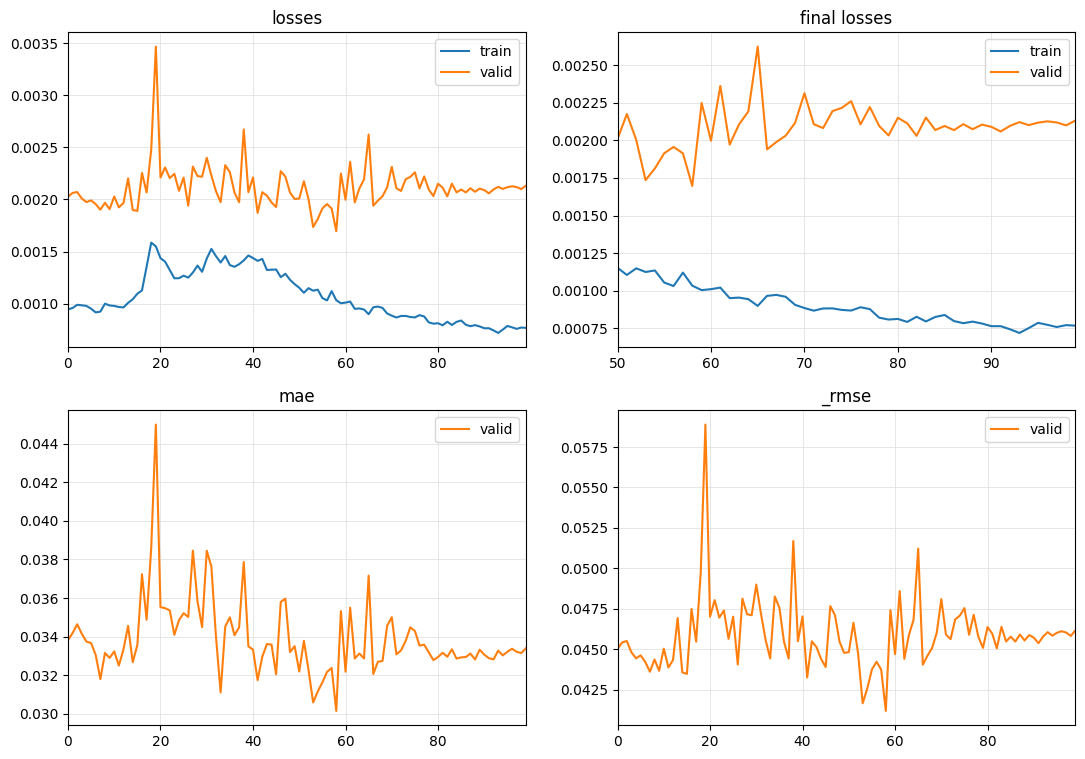

In [ ]:
learn.fit_one_cycle(100, lr_max=0.0003311311302240938)

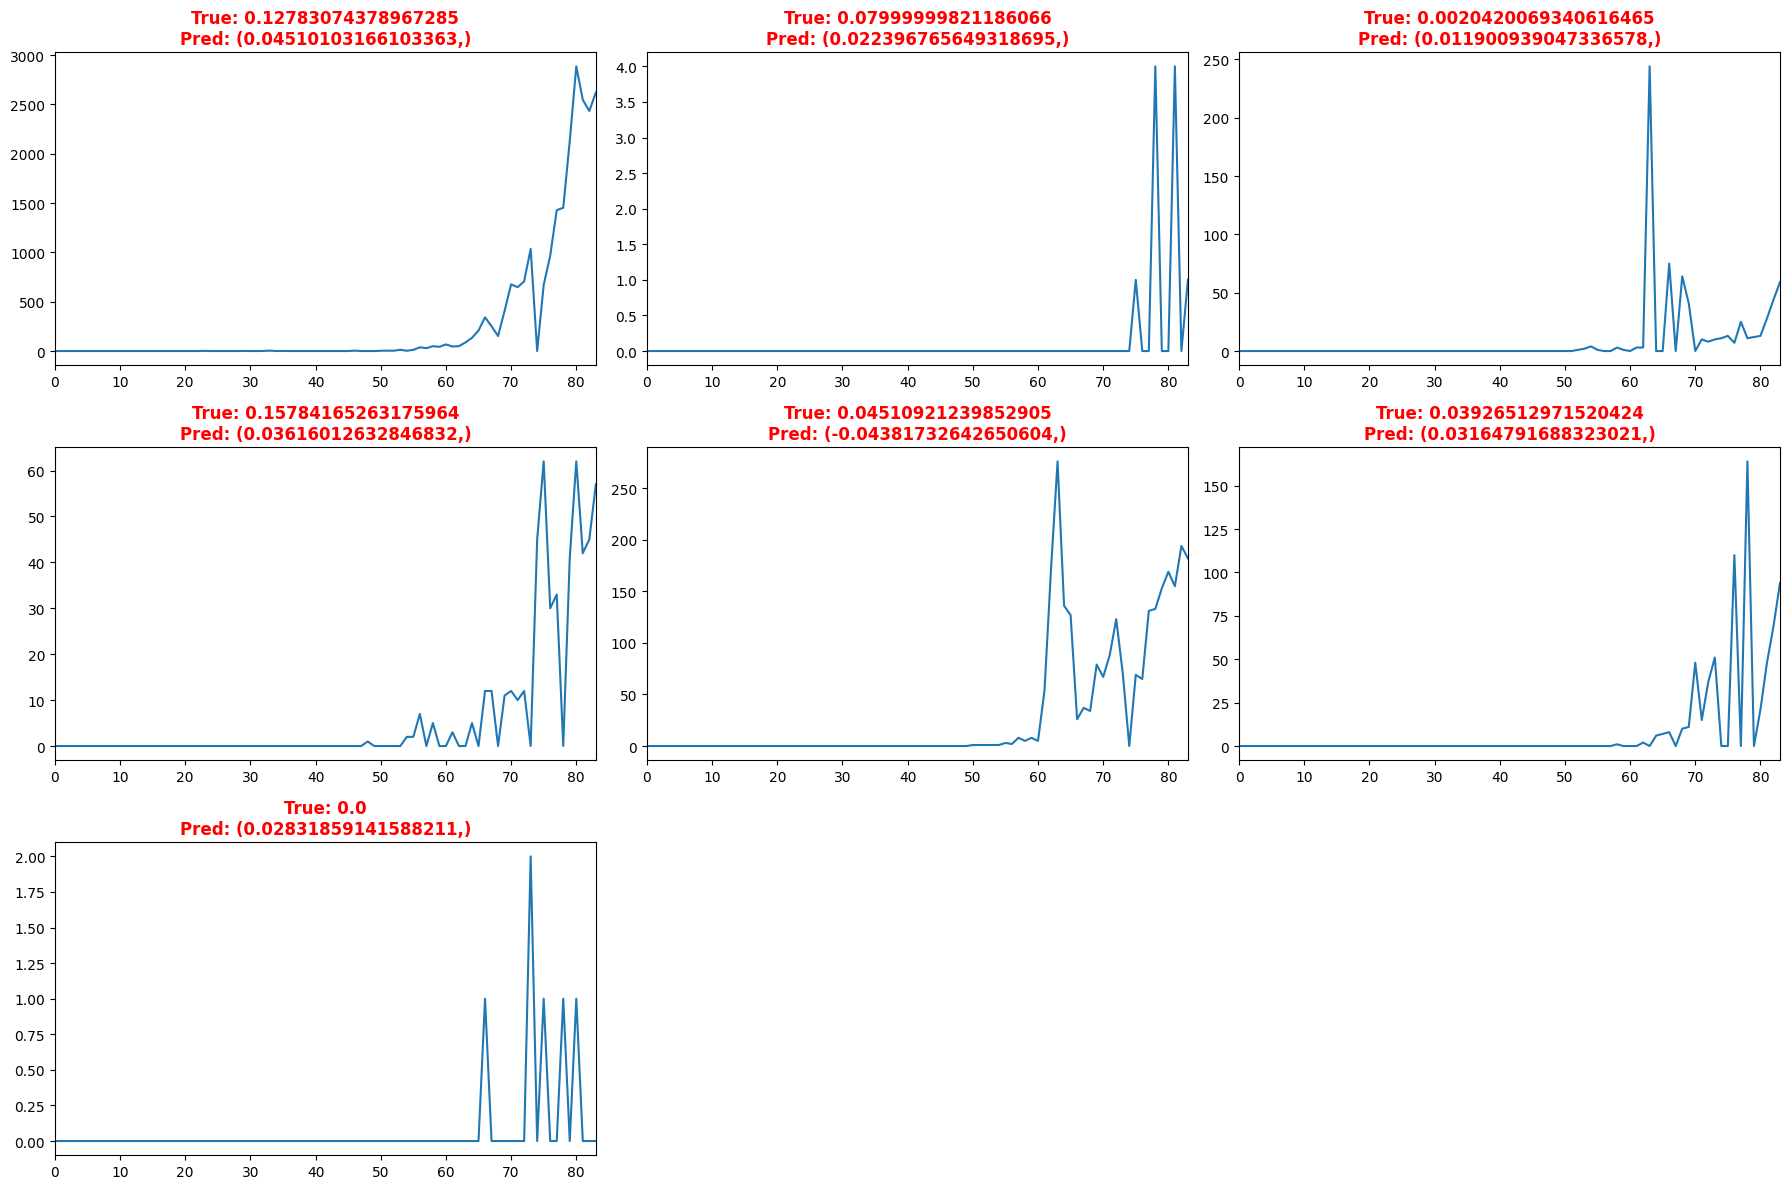

In [ ]:
learn.show_results()

Loss de Treinamento: A loss de treinamento começou em 0.000945 e teve uma leve diminuição até cerca de 0.000768 no final. Isso indica que o modelo está aprendendo e ajustando seus parâmetros.

Loss de Validação: A loss de validação, por outro lado, mostrou flutuações ao longo das épocas. Ela começou em 0.002027 e, embora tenha flutuado um pouco, terminou em 0.002132. A perda de validação que não diminui consistentemente pode ser um sinal de que o modelo está lutando para generalizar bem para dados não vistos.Esse comportamento é um possível sinal de overfitting.

MAE (Erro Absoluto Médio): A MAE começou em 0.033810 e teve pequenas flutuações ao longo das épocas, mas manteve-se razoavelmente estável, terminando em 0.033389. O MAE indica que o modelo está fazendo previsões razoavelmente precisas.

RMSE (Raiz do Erro Quadrático Médio): O RMSE começou em 0.045017 e variou ao longo das épocas, indo de 0.045022 a 0.046177 no final. O RMSE também se manteve relativamente estável, com pequenas variações, sugerindo que o modelo está mantendo uma precisão razoável em suas previsões.

Portanto, para evitar o possível overfitting, é importante utilizar técnicas de regularização como dropout ou L2 regularization (penalização de pesos grandes) para melhorar a generalização, bem como early stopping.

O modelo LSTM parece ser melhor, pois ele apresenta menor perda de validação, menor MAE e RMSE ao longo do treinamento. Isso sugere que ele tem uma performance mais sólida e precisa em relação ao modelo Inception Time. Portanto, até o momento foi o modelo com melhores resultados de predição.



**TST**

SuggestedLRs(valley=6.30957365501672e-05)

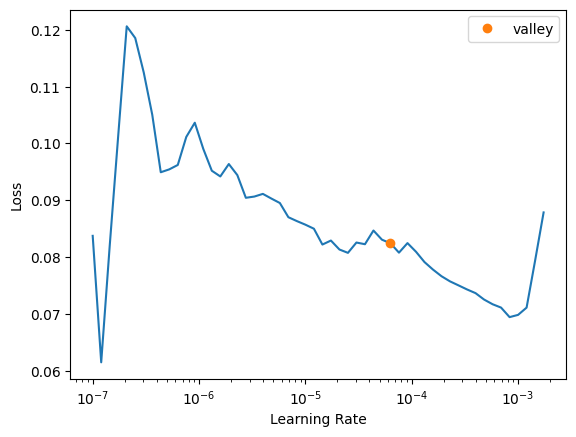

In [ ]:
learn = ts_learner(dls, TST, metrics=[mae, rmse], cbs=[ShowGraph()])
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.000879,0.002098,0.032942,0.045800,00:06
1,0.000769,0.002130,0.033124,0.046148,00:06
2,0.000836,0.002164,0.033316,0.046516,00:05
3,0.000819,0.002121,0.033082,0.046057,00:07
4,0.000793,0.002149,0.033381,0.046361,00:04
5,0.000744,0.002171,0.033495,0.046599,00:02
6,0.000730,0.002151,0.033340,0.046381,00:03
7,0.000737,0.002147,0.033526,0.046334,00:02
8,0.000750,0.002211,0.033952,0.047022,00:02
9,0.000780,0.002197,0.034302,0.046869,00:02


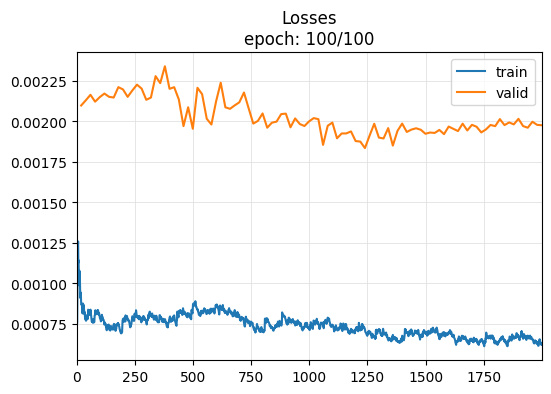

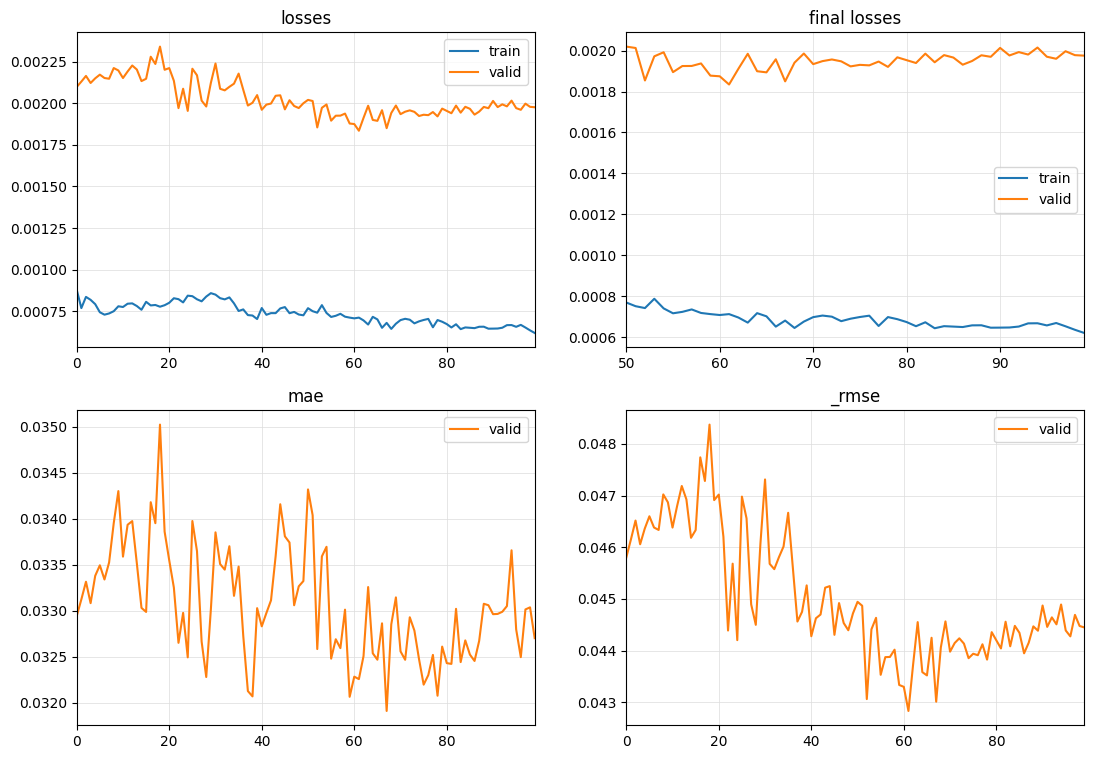

In [ ]:
learn.fit_one_cycle(100, lr_max=6.30957365501672e-05)

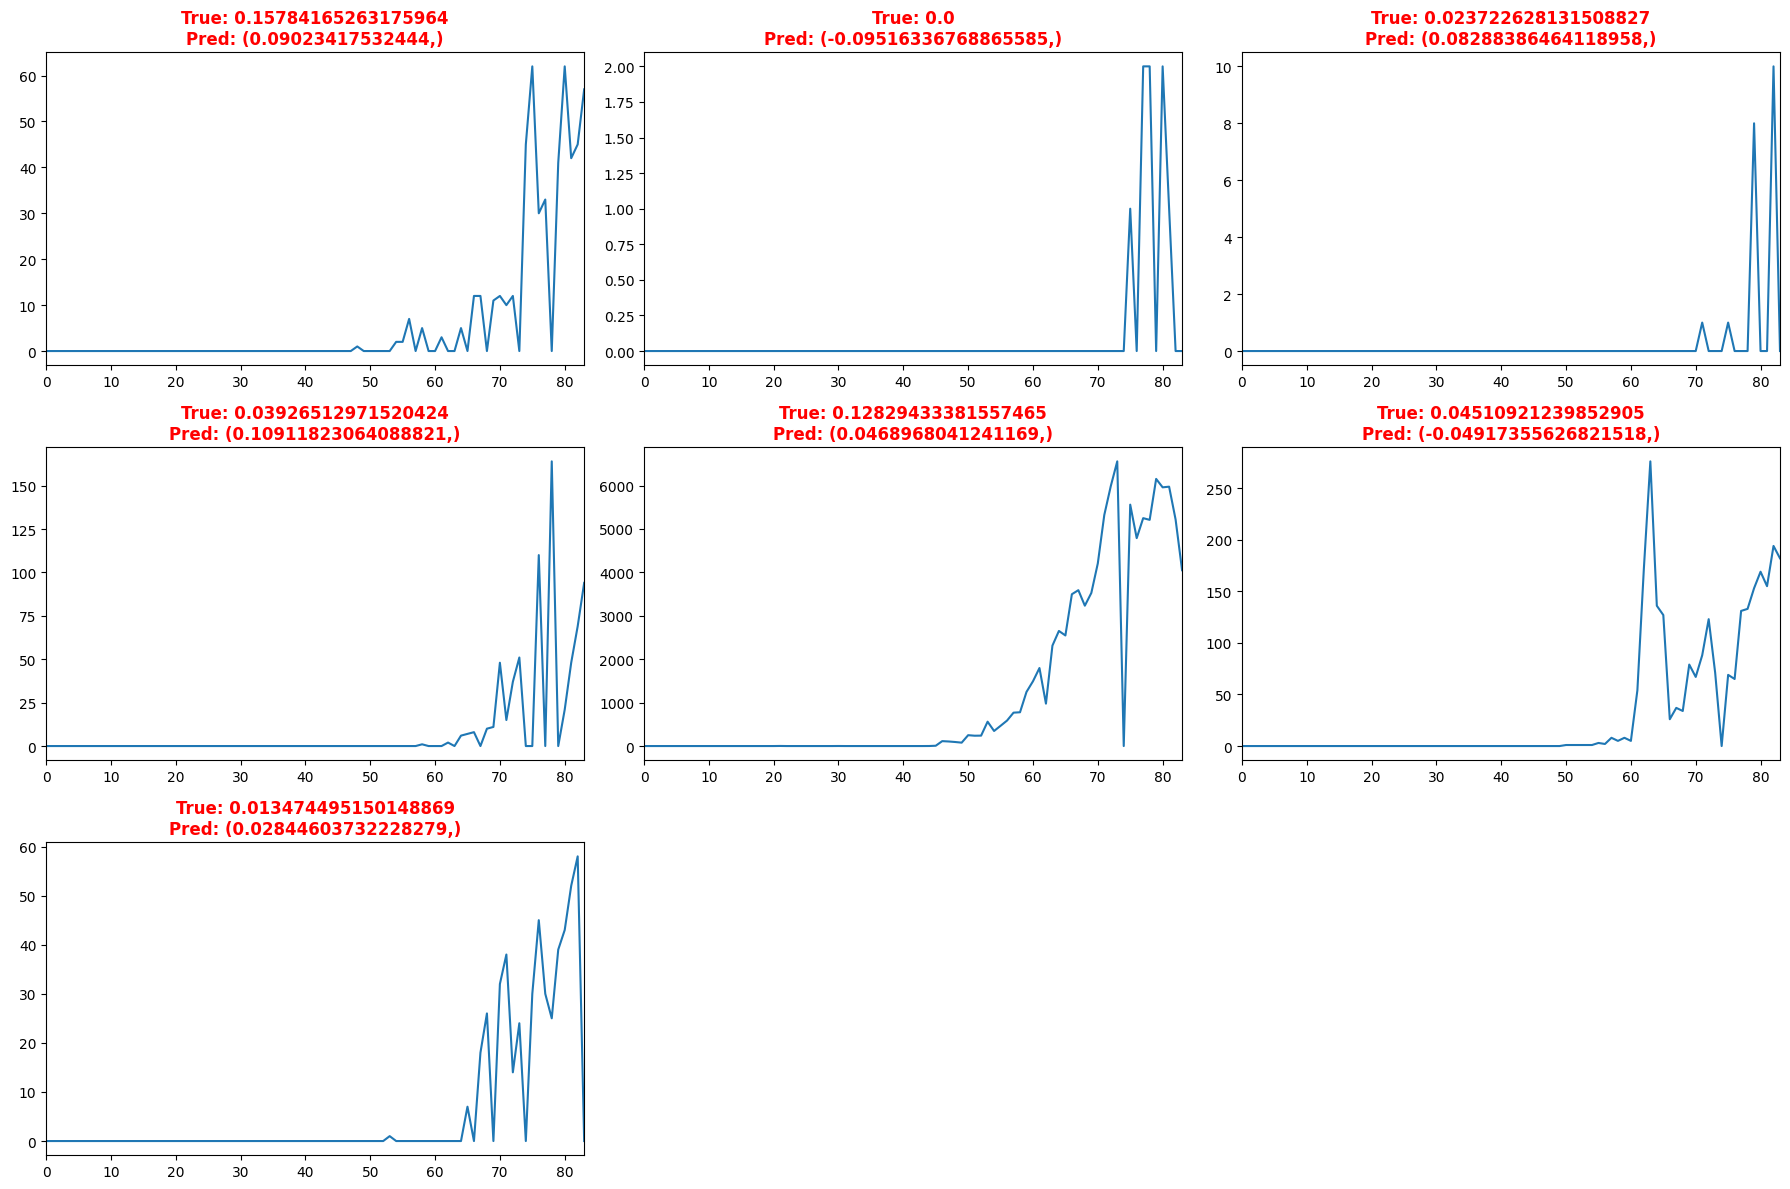

In [ ]:
learn.show_results()

A perda de treinamento começa em 0.000879 e diminui de forma constante até cerca de 0.000620 na última época (época 99). Isso indica que o modelo está aprendendo de forma eficiente e ajustando seus parâmetros para reduzir o erro de treinamento.

A perda de validação varia um pouco mais, mas mantém-se dentro de uma faixa próxima de 0.0020 durante grande parte das épocas. O valor final (0.001976) é ligeiramente inferior a alguns dos valores anteriores, sugerindo uma leve melhoria, mas sem uma grande redução consistente. Isso pode indicar que o modelo está sofrendo de overfitting, ou seja, ele pode estar se ajustando muito bem aos dados de treinamento, mas não melhorando muito nos dados de validação.

Erro Absoluto Médio (MAE): O MAE começa em 0.032942 e vai diminuindo aos poucos ao longo das épocas. No final, o MAE atinge 0.032702, mostrando uma pequena melhora na capacidade do modelo de prever os valores corretamente.

Erro Quadrático Médio (RMSE): O RMSE também mostra uma leve melhoria, diminuindo um pouco ao longo das épocas. No entanto, como o MAE, a redução é pequena e não há uma grande diferença ao longo do treinamento.

Caso seja possível realizar outros treinamentos para melhorar o modelo, é importante efetuar a regularização (como Dropout) para reduzir o overfitting, ou mesmo aumentar a complexidade do modelo se ele estiver subajustado (underfitting).

Sobre a comparação dos modelos, o LSTM ainda apresenta uma redução mais consistente nos erros (tanto MAE quanto RMSE) ao longo das épocas, especialmente nas últimas épocas.

**CONCLUSÃO DO QUADRO COMPARATIVO:**

No que tange os erros (MAE, RMSE), o modelo LSTM foi o melhor modelo  em relação a todos os outros, pois apresentou uma redução mais consistente ao longo das épocas.

Entretanto, é importante enfatizar que apesar do LSTM aparentar ser o melhor modelo quando comparado com GRU, Resnet, InceptionTime e TST, ainda teve os seus problemas.

O modelo LSTM apresentou um bom desempenho, se ajustou bem aos dados de treinamento mas na perda nos dados de validação flutuou um pouco e há momentos em que a perda de validação aumenta (por exemplo, nas épocas 15 e 48), o que pode sugerir overfitting. Assim, é importante em futuros treinamentos experimentar técnicas como early stopping, agendamento da taxa de aprendizado ou regularização e validação cruzada para buscar resolver esse problema.

# **8.2 MLP (Multi-Layer Perceptron)**

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_sk = MLPRegressor(activation='logistic', solver='lbfgs')

In [ ]:
print(df)

               0    1    2    3       4    5     6    7      8      9  ...  \
2020-01-01   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-02   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-03   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-04   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
2020-01-05   0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0    0.0    0.0  ...   
...          ...  ...  ...  ...     ...  ...   ...  ...    ...    ...  ...   
2020-03-20   0.0  0.0  0.0  0.0  3866.0  0.0  65.0  0.0  196.0  123.0  ...   
2020-03-21   3.0  7.0  0.0  0.0  3756.0  0.0  88.0  0.0  228.0  263.0  ...   
2020-03-22   0.0  9.0  0.0  3.0  4603.0  4.0  73.0  0.0  270.0  160.0  ...   
2020-03-23   0.0  0.0  0.0  1.0  2497.0  2.0  57.0  0.0    0.0  308.0  ...   
2020-03-24  12.0  0.0  0.0  0.0  4335.0  4.0  66.0  0.0  303.0  192.0  ...   

            195   196   197  198  199   200  mv_avg  mv_avg_15 

In [ ]:
# Remover as colunas mv_avg, mv_avg_15 e mv_avg_30
df.drop(columns=['mv_avg', 'mv_avg_15', 'mv_avg_30','mv_avg_60'], inplace=True)

# Verificando se as colunas foram removidas
print(df.head())

            0    1    2    3    4    5    6    7    8    9    ...  191  192  \
2020-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2020-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2020-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2020-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2020-01-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

            193  194  195  196  197  198  199  200  
2020-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 201 columns]


# **8.1.1 Dataset ts (país 35 - Inferência Externa Estados Unidos)- com diferenciação**

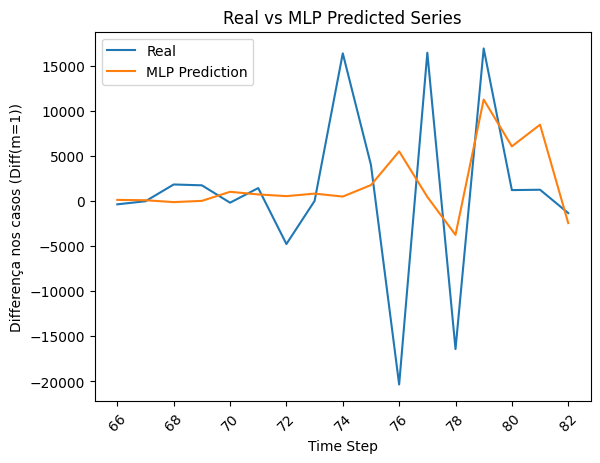

MSE: 91447022.46121657
RMSE: 9562.793653593943
MAE: 6136.0824577060985
MAPE: 2086787304045777.8%
R²: -0.009679582555341293


In [ ]:
# Função para criar janelas de dados (lag features)
def create_windowing(data, lag_size):
    rows = []
    for i in range(lag_size, len(data)):  # Começa de lag_size para garantir dados suficientes
        row = data.iloc[i - lag_size:i].values.flatten()  # Usando apenas os valores da coluna
        row = np.append(row, data.iloc[i].values.flatten())  # Prevendo o próximo valor
        rows.append(row)
    return rows

# Tamanho da janela (lag_size) e horizonte (horizon)
lag_size = 7  # A janela de 7 dias
horizon = 1  # Prevendo o próximo valor

# Divisão entre treino e teste
test_p = 0.3  # Proporção do conjunto de teste
test_size = int(len(ts) * test_p)
ts_train = ts[: -test_size]
ts_test = ts[-test_size:]

# Criando as janelas de treino e teste
ts_windowing_train = create_windowing(ts_train, lag_size)
ts_windowing_test = create_windowing(ts_test, lag_size)

# Convertendo as janelas para DataFrames
ts_train_air = pd.DataFrame(ts_windowing_train)
ts_test_air = pd.DataFrame(ts_windowing_test)

# Função para treinar e fazer previsões com MLP
def fit_predict(train_df, test_df):
    # Separando as variáveis independentes (X) e a dependente (y)
    x_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values
    x_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values

    # Normalizando os dados
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    x_train_scaled = x_scaler.fit_transform(x_train)
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
    x_test_scaled = x_scaler.transform(x_test)

    # Usando o MLPRegressor com o solver 'adam' e ativação 'relu'
    mlp_sk = MLPRegressor(activation='relu', solver='adam')

    mlp_sk.fit(x_train_scaled, y_train_scaled)

    y_pred = mlp_sk.predict(x_test_scaled)
    y_pred_renorm = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    return y_pred, y_pred_renorm, y_test

# Treinando e fazendo previsões
y_pred, y_pred_renorm, y_test = fit_predict(ts_train_air, ts_test_air)

# Usando o índice temporal correto (ts_test tem um índice temporal)
years_test = ts_test.index[lag_size:]  # Ajustando para o índice correto

# DataFrame
ts_mlp_result = pd.DataFrame({
    "Real": y_test.flatten(),
    "MLP Prediction": y_pred_renorm
}, index=years_test)

# Plotando os resultados
ts_mlp_result.plot()
plt.title("Real vs MLP Predicted Series")
plt.xlabel("Time Step")
plt.ylabel("Differença nos casos (Diff(m=1))")
plt.xticks(rotation=45)  # Rotacionando os ticks do eixo x para facilitar a leitura
plt.show()

# Calculando as métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

Antes de chegar a esse modelo, alguns parâmetros foram testados. Houve a piora dos resultados ao utilizar a função de ativação logistic e o otimizador lbfgs. Dessa forma, foi utilizado o Relu e Adam.

Também foi testada a normalização com o RobustScaler mas os resultados pioraram. Dessa forma, foi utilizado o MinMaxScaler().

Apesar desse modelo ter sido escolhido após os testes, ele não é um bom modelo, pelo contrário, teve um desempenho ruim em suas métricas:

* MSE alto (previsões muito distantes dos valores reais),
* RMSE alto (erro médio nas previsões foi grande),
* MAPE extremamente alto, o que indica que o erro percentual está fora de controle, possivelmente devido aos picos/outliers e aos valores 0 nos dados. O MAPE pode ser distorcido por outliers, pois é sensível a escalas de dados.
* R² (Coeficiente de Determinação): o seu valor negativo indica que o modelo está performando pior do que um modelo simples de média, ou seja, ele não está capturando a tendência dos dados.


# **8.1.2 Dataset pais_diff3 (com diferenciação) (país 138 - Inferência Externa Rússia)**

In [ ]:
#visualizar o dataset
print(pais_diff3)

    Diff(m=1)
0         0.0
1         0.0
2        41.0
3       -41.0
4         0.0
..        ...
78       40.0
79      -12.0
80        8.0
81      -14.0
82      -24.0

[83 rows x 1 columns]


In [ ]:
# Gerar um intervalo de datas começando de 1º de janeiro de 2020
num_colunas = pais_diff3.shape[1]  # Número de colunas no DataFrame
datas2 = pd.date_range(start="2020-01-01", periods=num_colunas, freq='D')

# Substituir os nomes das colunas pelas datas geradas
pais_diff3.columns = datas2

# Exibir o DataFrame com as novas colunas
print(pais_diff3)

    2020-01-01
0          0.0
1          0.0
2         41.0
3        -41.0
4          0.0
..         ...
78        40.0
79       -12.0
80         8.0
81       -14.0
82       -24.0

[83 rows x 1 columns]


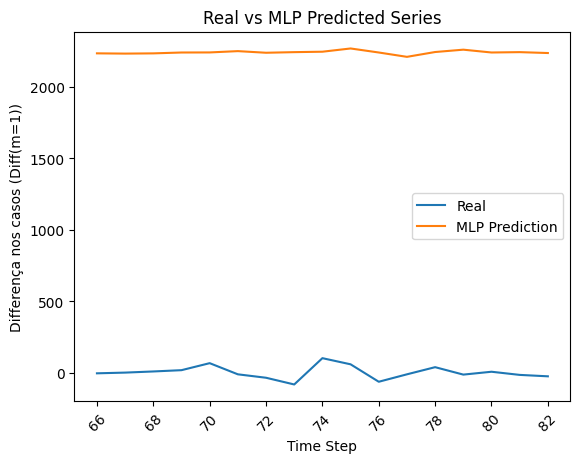

MSE: 1975.6996876645076
RMSE: 44.44884349074234
MAE: 32.97349079254968
MAPE: 0.9981875924595026%
R²: -0.004505871993474075


In [ ]:
# Função para criar janelas de dados (lag features)
def create_windowing(data, lag_size):
    rows = []
    for i in range(lag_size, len(data)):  # Começa de lag_size para garantir dados suficientes
        row = data.iloc[i - lag_size:i].values.flatten()  # Usando apenas os valores da coluna
        row = np.append(row, data.iloc[i])
        rows.append(row)
    return rows

# Tamanho da janela (lag_size) e horizonte (horizon)
lag_size = 7  # A janela de 7 dias
horizon = 1  # Prevendo o próximo valor

# Divisão entre treino e teste
test_p = 0.3  # Proporção do conjunto de teste
test_size = int(len(pais_diff3) * test_p)
pais_diff3_train = pais_diff3[: -test_size]
pais_diff3_test = pais_diff3[-test_size:]

# Criando as janelas de treino e teste
pais_diff3_windowing_train = create_windowing(pais_diff3_train, lag_size)
pais_diff3_windowing_test = create_windowing(pais_diff3_test, lag_size)

# Convertendo as janelas para DataFrames
pais_diff3_train_air = pd.DataFrame(pais_diff3_windowing_train)
pais_diff3_test_air = pd.DataFrame(pais_diff3_windowing_test)

# Função para treinar e fazer previsões com MLP
def fit_predict(train_df, test_df):
    # Separando as variáveis independentes (X) e a dependente (y)
    x_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values
    x_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values

    # Normalizando os dados
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    x_train_scaled = x_scaler.fit_transform(x_train)
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
    x_test_scaled = x_scaler.transform(x_test)

    # Usando o MLPRegressor com o solver 'adam' e ativação 'relu'
    mlp_sk = MLPRegressor(activation='relu', solver='adam')
    mlp_sk.fit(x_train_scaled, y_train_scaled)

    y_pred = mlp_sk.predict(x_test_scaled)
    y_pred_renorm = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    return y_pred, y_pred_renorm, y_test

# Treinando e fazendo previsões
y_pred, y_pred_renorm, y_test = fit_predict(pais_diff3_train_air, pais_diff3_test_air)

# Usando o índice temporal correto (pais_diff3_test tem um índice temporal)
years_test = pais_diff3_test.index[lag_size:]  # Ajustando para o índice correto

# DataFrame
pais_diff3_mlp_result = pd.DataFrame({
    "Real": y_test.flatten(),
    "MLP Prediction": y_pred_renorm
}, index=years_test)

# Plotando os resultados
pais_diff3_mlp_result.plot()
plt.title("Real vs MLP Predicted Series")
plt.xlabel("Time Step")
plt.ylabel("Differença nos casos (Diff(m=1))")
plt.xticks(rotation=45)  # Rotacionando os ticks do eixo x para facilitar a leitura
plt.show()

# Calculando as métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')


Nesse modelo não foram usados dados brutos, foi feita a diferenciação para remover tendências e aumentar a estacionaridade da série. Isso permitiu uma melhora das métricas.

Os resultados, entretanto, indicam que esse modelo MLP não está performando bem, principalmente devido ao valor negativo de R², sugerindo que o modelo não está capturando as variações na série temporal de maneira eficiente e que o modelo MLP pode estar fazendo previsões piores do que simplesmente prever a média dos dados.




#**5.Conclusões**

O presente trabalho utilizou o dataset 'Covid3Month', presente no tsai. Apesar de extensa procura sobre sua documentação, não foi encontrada. Entretanto, o trabalho acadêmico elaborado por Chang Wei Tan e outros autores, cujo link está na sessão base de dados, permitiu obter informações gerais sobre o dataset (criação autoral de tais estudantes da Universidade Monash). Portanto, devido a limitação da pesquisa, não foi possível identificar os países presentes nas linhas, mas foi realizada inferência através de informações externas.

Ocorreu tratamento e análise dos dados, com a estruturação de algumas visualizações, análises e conclusões.

Posteriormente, foram realizados treinamentos e testes em alguns modelos tradicionais (AR, MA, ARMA, ARIMA) e em redes neurais profundas: biblioteca TSAI e arquiteturas LSTM, GRU, Resnet, InceptionTime e TST, assim como em MLP.

Nos modelos tradicionais, houve a aplicação dos modelos às colunas dos Estados Unidos e Rússia (inferência externa), devido aos seus comportamentos singulares: maior número de casos e melhor distribuição dos dados na base de dados, respectivamente. O mesmo ocorreu com o MLP.

Na sessão de redes neurais profundas: biblioteca TSAI e arquiteturas LSTM, GRU, Resnet, InceptionTime e TST, os modelos foram aplicados sobre todo o dataset, sem aplicação de filtros dos países, como no anterior.

Durante todo o trabalho, conclusões e análises foram tecidas. É importante ressaltar que nenhum modelo foi considerado muito bom, ideal, todos precisam de melhorias. Por exemplo, no LSTM ( melhor modelo do quadro comparativo do TSAI - redes neurais profundas) é importante em futuros treinamentos aplicar regularização (como Dropout) para reduzir o overfitting.

